# <center> 20181768_이영준_텐서플로 기반 딥러닝 프로그래밍</center>

![ven6](img/ven6.png)


#### 목적

    - 

In [1]:
 """tensorflow 버전 확인 """
import tensorflow as tf
tf.__version__

'2.6.1'

In [2]:
import sklearn as sk
sk.__version__

'0.24.1'

In [3]:
import site
site.getsitepackages()

['C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages']

기초 이론

데이터프레임과 선형회귀

회귀(regresson)와 분류(classification)
    
    회귀 모델 (일반적인 경제 그래프로 생각)
       - 연속적인 값을 예측
            캘리포니아의 주택 가격은 얼마인가?
            사용자가 이 광고를 클릭할 확률은 얼마인가?
            
            
            
        -회귀 분석
            관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한 뒤 적합도 측정하는 분석 방법
            회귀분석은 시간에 따라 변화하는 데이터나 어떤 영향, 가설적 실험, 인과 관계 모델링 등의 통게적 예층에 이용
            

            
    분류 모델(문제를 넣고 분류를 통해 정답을 출력)
        -불연속적인 값을 예측
            주어진 이메일 메시지가 스팸인가? 아닌가?
            이 이미지가 강아지인가 고양이인가 햄스터인가?

판다스란?

표 형식의 데이터나 다양한 형태의 테이블을 처리하기 위한 라이브러리
![pandas](img/판다스.png)

데이터프레임
행과 열은 "인덱스" 와 컬럼으로 구분

pd.DataFrame으로 참고
![pandas2](img/판다스2.png)

In [4]:
"""판다스 라이브러리 불러오기"""
import pandas as pd
print(pd.__version__)

1.2.4


In [5]:
"""리스트를 생성하고 자료형 알아보기"""
data1 = ['a','b','c','d','e']
print(data1)
print('자료형: ', type(data1))

['a', 'b', 'c', 'd', 'e']
자료형:  <class 'list'>


In [6]:
"""리스트를 시리즈로 전환"""
sr1 = pd.Series(data1)
print("자료형 : ", type(sr1))
print(sr1)

자료형 :  <class 'pandas.core.series.Series'>
0    a
1    b
2    c
3    d
4    e
dtype: object


위를 보면 리스트 data1은 sr1이라는 시리즈로 변환이되고

index가 0으로 시작하고 값이 a,b,c,d,e를 가지는 시리즈로 변환이 됐음을 알 수 있음

In [7]:
# 배열과 마찬가지로 인덱스로 값을 호출 할 수 있다!
sr1[1] 

'b'

In [8]:
# 로케이션으로도 출력가능
sr1.loc[0]

'a'

In [9]:
# 저번에 배운 슬라이스도 적용이 가능하다.
#유의점 : 리스트나 그런건 [2:4]일시 4를 제외한 것이지만 시리즈.loc[x:y]는 x부터 y까지
sr1.loc[2:4]

2    c
3    d
4    e
dtype: object

In [10]:
#리스트말고 투플 또한 판다스 시리즈로 변환
#튜플 생성
data2 = (1,2,3.14,100,-10)
type(data2)

tuple

In [11]:
#튜플을 판다스 시리즈로 변환
sr2 = pd.Series(data2)
print(sr2)

0      1.00
1      2.00
2      3.14
3    100.00
4    -10.00
dtype: float64


위에서 리스트로 만든 시리즈 sr1과 튜플로 만든 시리즈 sr2가 있다.

이 둘을 결합하여 데이터프레임으로 변환할 수 있다.

In [12]:
#딕셔너리로 생성
#c0(열)에는 sr1을 c1(열)에는 sr2를
dict_data={'c0' : sr1, 'c1':sr2}
#데이터 프레임으로 변환
df1 = pd.DataFrame(dict_data)
df1

,c0,c1
0,a,1.00
1,b,2.00
2,c,3.14
3,d,100.00
4,e,-10.00


인덱스는 0부터 4를, 컬럼에는 c0과 c1으로 된 데이터 프레임이 완성됐다.

In [13]:
#열(컬럼) 출력
df1.columns

Index(['c0', 'c1'], dtype='object')

In [14]:
#열을 다른 이름으로 수정할 수 있음
df1.columns = ['string','number']
df1

,string,number
0,a,1.00
1,b,2.00
2,c,3.14
3,d,100.00
4,e,-10.00


c0은 string으로 c1은 number로 변환이 됐다.

열을 바꿔봤다

그러면 이제 행 인덱스를 바꿔보자

In [15]:
df1.index

RangeIndex(start=0, stop=5, step=1)

In [16]:
#default로 0부터 1씩 올라가는 인덱스를 사용자 지정으로 바꿔보자
df1.index = ['r0','r1','r2','r3','r4']
df1

,string,number
r0,a,1.00
r1,b,2.00
r2,c,3.14
r3,d,100.00
r4,e,-10.00


우리는 밑 그림과 같이 원하는 값을 출력하고 싶다.

그럼 어떻게 해야 하는가?

![pandas3](img/판다스3.png)


<center>정답은 인형뽑기다.</center>


![pandas4](img/판다스4.png)


인형 뽑기는 z축이 0이라는 가정하에 x와 y만 이동하면 된다.


In [17]:
#x축은 r2(인덱스), y축은 number(컬럼)이라고 생각
df1.loc['r2','number']

3.14

In [18]:
#데이터 프레임의 부분 추출 또한 가능하다. (슬라이스 활용)
#행이 r2와 r3, 열이 string, number인 값들을 ★데이터프레임 형식★으로 출력
df1.loc['r2':'r3', 'string':'number']

,string,number
r2,c,3.14
r3,d,100.00


In [19]:
#but 컬럼 값이 하나라면? ★시리즈 형식★으로 출력
df1.loc['r2':'r4','number']

r2      3.14
r3    100.00
r4    -10.00
Name: number, dtype: float64

In [20]:
#그렇다면 컬럼 값이 다수고 index의 값이 하나라면?
#이것 또한 ★시리즈 형식★으로 출력한다!
df1.loc['r2','string':'number']

string       c
number    3.14
Name: r2, dtype: object

### 선형 회귀

In [21]:
#x변수, y변수 데이터 만들기(1차 함수)
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]
print(x)
print(y)

[-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
[-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]


![sun1](img/선형회귀1.png)

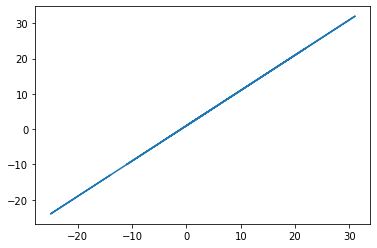

In [22]:
#앞서 생성했던 x와 y를 그래프에 찍고 그걸 이은 것
import matplotlib.pyplot as plt #그래프 그리는 라이브러리 maplotlib
plt.plot(x, y)
plt.show()

In [23]:
#판다스 데이터프레임으로 만들어 보기

df = pd.DataFrame({'X':x,'Y':y})
#각 행/열에 몇 개 인지 알아보는 것 데이터프레임.shape
df.shape

(10, 2)

In [24]:
df

,X,Y
0,-3,-2
1,31,32
2,-11,-10
3,4,5
4,0,1
5,22,23
6,-2,-1
7,-5,-4
8,-25,-24
9,-14,-13


위 지식을 바탕으로 선형회귀 모델을 구현해보자


In [25]:
#x축 y축 나누기
train_features = ['X']
target_cols = ['Y']
X_train = df.loc[:, train_features]
y_train = df.loc[:, target_cols]
print(X_train.shape, y_train.shape)

(10, 1) (10, 1)


In [26]:
X_train

,X
0,-3
1,31
2,-11
3,4
4,0
5,22
6,-2
7,-5
8,-25
9,-14


In [27]:
y_train

,Y
0,-2
1,32
2,-10
3,5
4,1
5,23
6,-1
7,-4
8,-24
9,-13


In [28]:
#라이브러리 불러오기 사킷런
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
#lr에 x,y데이터를 전달 (fit)
lr.fit(X_train, y_train) 

LinearRegression()

In [29]:
#coef는 기울기를 intercpet는 y절편을!
lr.coef_, lr.intercept_

(array([[1.]]), array([1.]))

In [30]:
#기울기는 2차원의 데이터, 절편은 1차원의 데이터
print ("기울기: ", lr.coef_[0][0])
print ("y절편: ", lr.intercept_[0])

기울기:  1.0
y절편:  1.0


reshape(x,y)는 2차원 x행 x열로 모양 변환

reshape(-1,y)는 2차원 (알아서)행 y열로 모양 변환

In [31]:
import numpy as np
#문제 지정 
X_new = np.array(20).reshape(1, 1)
X_new

array([[20]])

In [32]:
#lr.predict(2차원 행렬 문제)
lr.predict(X_new)

array([[21.]])

In [33]:
#11부터 16까지 문제로 저장
X_test = np.arange(11, 16, 1).reshape(-1, 1)
X_test

array([[11],
       [12],
       [13],
       [14],
       [15]])

In [34]:
#문제에 대한 답을 출력
y_pred = lr.predict(X_test)
y_pred

array([[12.],
       [13.],
       [14.],
       [15.],
       [16.]])

## 분류 구현
### 붓꽃을 분류해보자


iris는 세가지 품종이 있다.
![bun1](img/붓꽃1.png)
<center>왼쪽부터 Setosa Versicolor        Virginica </center>




이 3가지 iris를 어떻게 구분하는가?

1. 꽃잎과 꽃밫침의 너비와 길이 총 4개

2. 정답은 3개의 붓꽃 중 하나

In [35]:
# 라이브러리 환경
import pandas as pd
import numpy as np

In [36]:
# skleran 데이터셋에서 iris 데이터셋 로딩
from sklearn import datasets
iris = datasets.load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [37]:
#Bunch는 사전이란 의미를 함유하고 있다
type(iris)


sklearn.utils.Bunch

In [38]:
# iris 데이터셋은 딕셔너리 형태이므로, key 값을 확인
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
# DESCR 키를 이용하여 데이터셋 설명(Description) 출력
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Iris의 핵심은 이 것 이다.
**Data Set Characteristics:**
     150가지의 샘플과 4가지 분류 방법
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    
    
    iris의 4가지 분류 방법
    :Attribute Information 
        - sepal length in cm  꽃받침의 세로 길이
        - sepal width in cm   꽃받침의 가로 길이
        - petal length in cm  꽃잎의 세로 길이
        - petal width in cm   꽃잎의 가로 길이
        
        
        
        
        iris의 3가지 종류 Setosa,Versicoluour Virginica
        - class:
                - Iris-Setosa 
                - Iris-Versicolour
                - Iris-Virginica
                

![bun2](img/붓꽃2.png)



데이터와 분류 방식은 있다.
그렇다면 "분류"는 어떻게 해야하는가?

K 최근접 이웃 ( K N N / K-Nearest Negihobrs)

    정답이 있는 지도 학습에 활용, 가장 간단한 알고리즘
    
    회귀와 분류 모두 사용

새로운 입력 자료에 대해 주위에 가장 많은 유형으로 분류

-> 여러가지 정답의 분포 속에서 자신이 입력한 답이 이미 존재하고 있는 가장 많은 유형으로 분류한다는 것

★이렇게 이해하면 된다★

재활용 쓰레기 통을 보면
유리 / 플라스틱으로 구분 되어 있다.

자신이 유리병을 들고 있으면 어디 넣어야 하는게 맞을까?

바로 유리가 많은 곳에 넣으면 된다

왜냐하면 유리가 많은 곳은 높은 확률로 유리를 넣으라고 되있으니까!

In [40]:
# data 속성을 판다스 데이터프레임으로 변환
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("데이터프레임의 형태:", df.shape)
df.head()

데이터프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:

# 열(column) 이름을 간결하게 변경
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [42]:
# Target 열 추가
df['Target'] = iris['target']
print('데이터셋의 크기: ', df.shape)
df.head()

데이터셋의 크기:  (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# 데이터프레임의 기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [44]:

# 중복 데이터 제거
df = df.drop_duplicates()
df.loc[(df.sepal_length==5.8)&(df.petal_width==1.9), :]

,sepal_length,sepal_width,petal_length,petal_width,Target
101,5.8,2.7,5.1,1.9,2


In [45]:
# 시각화 라이브러리 설정
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

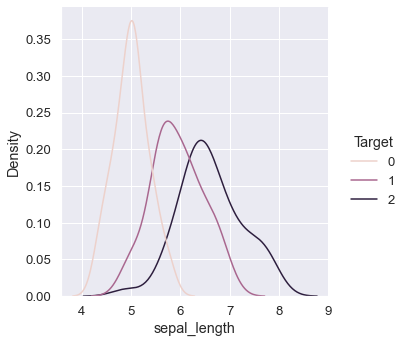

In [46]:
# 품종별 sepal_length 값의 분포 비교
sns.displot( x='sepal_length', hue='Target', kind='kde', data=df)
plt.show()

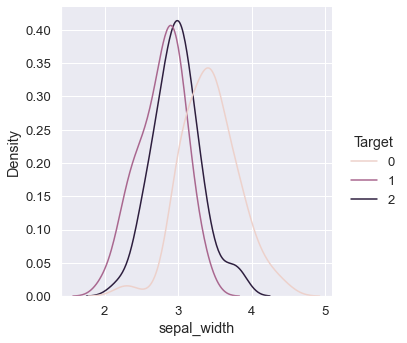

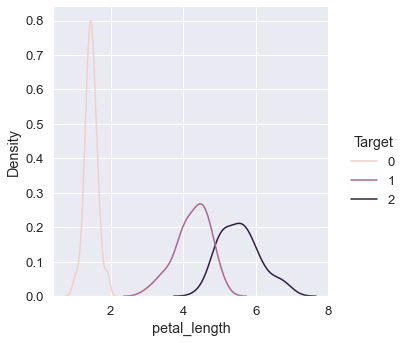

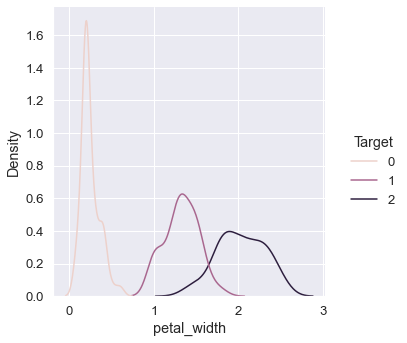

In [47]:
# 나머지 3개 피처 데이터를 한번에 그래프로 출력
for col in ['sepal_width', 'petal_length', 'petal_width']:
    sns.displot(x=col, hue='Target', kind='kde', data=df)
plt.show()

위 결과 값을 총 정리 한 것이 바로 아래의 그래프이다.

아래 데이터 분포 그래프를 통해 정답을 맞출 수 있도록 할 수 있다.

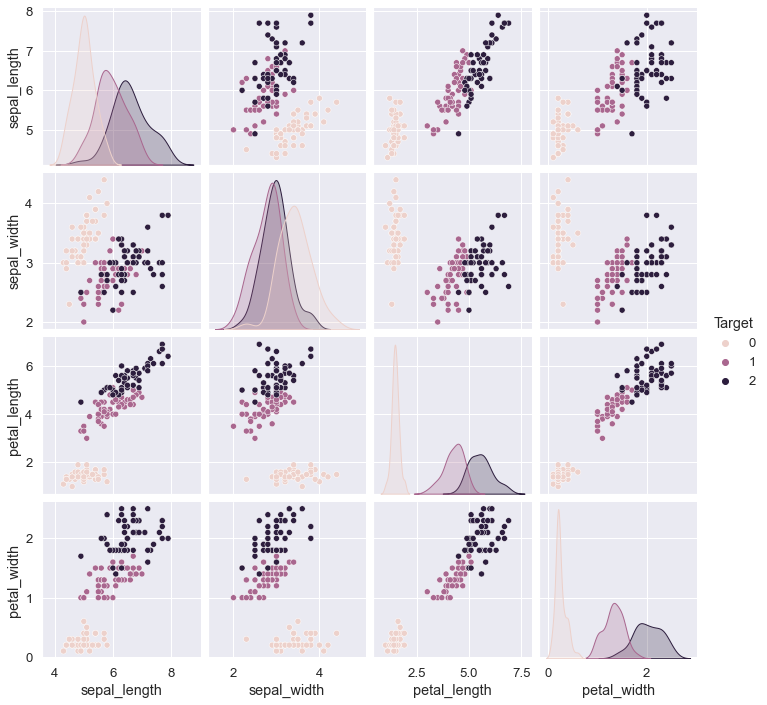

In [48]:
# 두 변수 간의 관계 / 
sns.pairplot(df, hue = 'Target', diag_kind = 'kde')
plt.show()

In [49]:
df

,sepal_length,sepal_width,petal_length,petal_width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [50]:
#150개 중의 20개를 테스트
#X_train은 문제, Y_train은 정답
#X_test는 문제, Y_test는 정답
from sklearn.model_selection import train_test_split

X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

#X_train은 4가지 특성의 정보

(119, 4) (119,)
(30, 4) (30,)


In [51]:
# 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [52]:
# 예측
#Y는 정답, X는 문제 predict <- 예측하다라는 영단어
y_knn_pred = knn.predict(X_test)
print("예측값: ", y_knn_pred[:5])

예측값:  [0 1 1 2 1]


In [53]:
# 성능 평가 (정확도 평가)
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
print("Accuracy: %.4f" % knn_acc)

Accuracy: 0.9667


SVM(Support Vector Machine)

두 분류 사이의 거리인 마진(margin)을 최대화하는 분류 기준 경계인 결정 경계(decision boundary)를 찾는 모델

    1. 이진 분류에 주로 사용
    2. 딥러닝과 함께 인식율이 매우 좋아 최근까지도 가장 많이 사용하는 알고리즘
    
 
 
 ![SVM1](img/SVM1.png)
 초록색 : 결정경계
 
 노란색 : 마진
 
 붉은색과 푸른색은 서로 다른 분류
 
 
 
 Q.그럼 이 알고리즘은 어떻게 정답을 판별하는가?
 
 A.결정경계를 통해 새로운 문제가 붉은색 분류에 가까운지 푸른색 분류에 가까운지 판별해서 정답을 맞춘다
 
 ![SVM2](img/SVM2.png)
 
 이 주황색 점은 B그룹에 분류된다
 
 
 그렇다면 위에서 배운 붓꽃 분류와 SVM을 혼합해보자

In [54]:
# 모델 학습
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [55]:
# 예측
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred[:5])
# 성능 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy: %.4f" % svc_acc)

예측값:  [0 1 1 2 1]
Accuracy: 1.0000


In [56]:
# SVM을 적용한 붓꽃 분류
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 1. 데이터 준비와 전처리
iris = datasets.load_iris()

# 데이터프레임 생성과 열 지정
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['Target'] = iris['target']

# 중복 데이터 제거
df = df.drop_duplicates()

# 2. 학습 데이터, 테스트 데이터 준비
X_data = df.loc[:, 'sepal_length':'petal_width']
y_data = df.loc[:, 'Target']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                    test_size=0.2, shuffle=True, random_state=20)

# 모델 학습
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# 4. 예측
y_svc_pred = svc.predict(X_test)
print("예측값: ", y_svc_pred[:10])
print("정답 : ", y_test[:10].values)

# 5. 성능 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
print("Accuracy: %.4f" % svc_acc)

예측값:  [0 1 1 2 1 1 2 0 2 0]
정답 :  [0 1 1 2 1 1 2 0 2 0]
Accuracy: 1.0000


MINIST 손글씨

 ![SON1](img/SON1.png)
 
 
 글씨 이미지를 알고리즘으로 판독해 이 것이 숫자 몇인지 판별하는 것


 ![SON2](img/SON2.png)

In [57]:
import tensorflow as tf
tf.__version__

'2.6.1'

In [58]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train(훈련용 문제),y_train(훈련용 문제 정답) ,x_test(테스트 문제), y_test(테스트 문제 정답)

In [59]:
#3차원 배열 6만개의 28x28 이미지
x_train.shape

(60000, 28, 28)

In [60]:
y_train.shape

(60000,)

In [61]:
# 첫번째 이미지 x_train[0]
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [62]:
#첫 번째 이미지의 정답은?
y_train[0]

5

In [63]:
# MNIST 데이터셋을 훈련과 테스트 데이터로 로드하여 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST 형태를 알아 봅시다. 데이터 수, 행렬 형태 등
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# MNIST 훈련 데이터의 내부 첫 내용도 알아보자.
print(x_train[0])
print(y_train[0])

# MNIST 테스트 데이터의 내부 첫 내용도 알아보자.
print(x_test[0])
print(y_test[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [64]:
#x_train[0]는 정말 5처럼 나올까?
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%3d' % i)
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

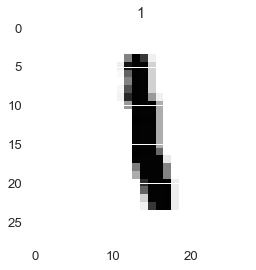

In [65]:
#훈련 데이터 첫 손글씨 보기
import matplotlib.pyplot as plt

n = 6
ttl = str(y_train[n])
plt.figure(figsize=(6, 4))
plt.title(ttl) #정답표기
plt.imshow(x_train[n], cmap='Greys'); #정답 그리기

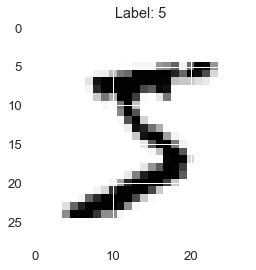

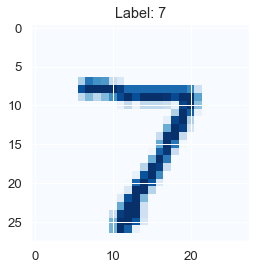

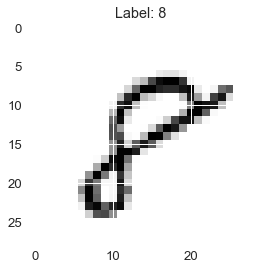

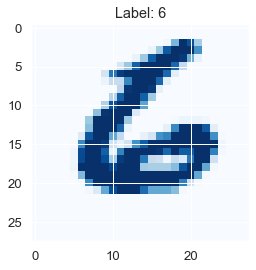

In [66]:
###############################################
# MNIST 데이터(훈련, 테스트)의 내부 첫 내용을 그려보자.
import matplotlib.pyplot as plt

tmp = "Label: " + str(y_train[0])
plt.title(tmp)
plt.imshow(x_train[0], cmap="Greys")
plt.show()

tmp = "Label: " + str(y_test[0])
plt.title(tmp)
plt.imshow(x_test[0], cmap='Blues')
plt.show()

# MNIST 데이터(훈련, 테스트)의 내부 마지막 내용을 그려보자.
idx = len(x_train) - 1
tmp = "Label: " + str(y_train[idx])
plt.title(tmp)
plt.imshow(x_train[idx], cmap="Greys")
plt.show()

idx = len(x_test) - 1
tmp = "Label: " + str(y_test[idx])
plt.title(tmp)
plt.imshow(x_test[idx], cmap='Blues')
plt.show()
###############################################

In [67]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

from random import sample
nrows, ncols = 4, 5 #출력 가로 세로 수
# 출력할 첨자 선정
idx = sorted(sample(range(len(x_train)), nrows * ncols)) 
print(idx)

[1116, 2384, 8748, 9670, 13296, 21621, 23918, 26108, 27535, 29166, 31890, 36748, 39438, 44718, 48614, 52573, 52780, 52960, 54730, 55296]


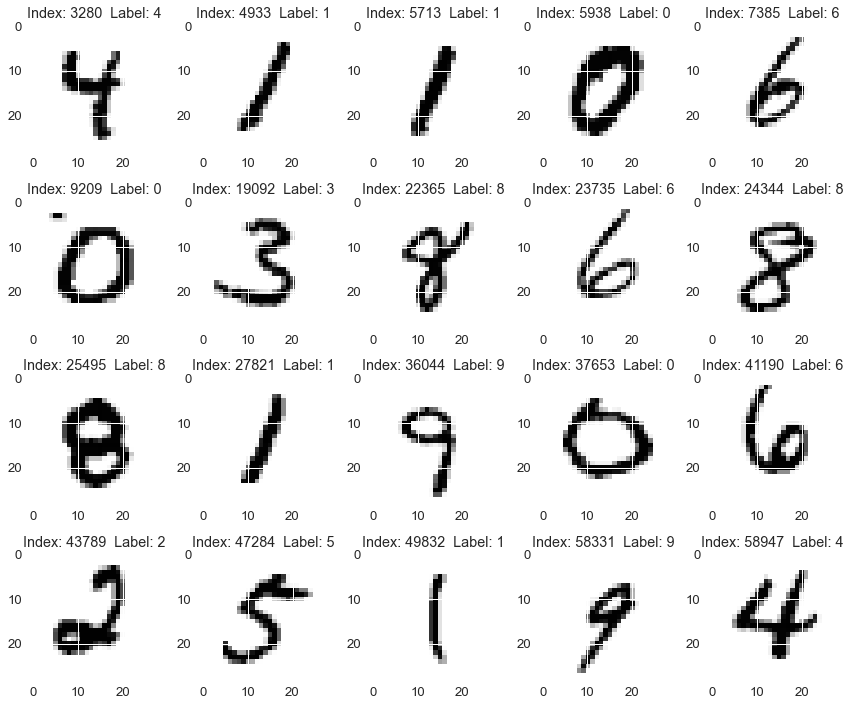

In [68]:
###############################################
#랜덤하게 20개의 훈련용 자료를 그려 보자.
from random import sample

nrows, ncols = 4, 5 #출력 가로 세로 수
idx = sorted(sample(range(len(x_train)), nrows * ncols)) # 출력할 첨자 선정
#print(idx)

count = 0
plt.figure(figsize=(12, 10))

for n in idx:
    count += 1
    plt.subplot(nrows, ncols, count)
    tmp = "Index: " + str(n) + "  Label: " + str(y_train[n])
    plt.title(tmp)
    plt.imshow(x_train[n], cmap='Greys')

plt.tight_layout()
plt.show()
###############################################

딥러닝 구현 순서

필요 모둘 임포트(import)

    1. 훈련과 정답 데이터 지정    
    2. 모델 구성
    3. 학습에 필요한 최적화 방법과 손실 함수 등 설정
    4. 생성된 모델로 훈련 데이터 학습
    5. 테스트 데이터로 성능평가
    
주요 용어

데이터셋
   - 훈련용과 테스트용
    Train data set, Test data set
    x(입력, 문제), y(정답 레이블)
   - 전처리

모델
   - 딥러닝 핵심 신경망, 여러층 구성
        1. 완전연결층
            Dense()
        2. 1차원 배열로 평탄화
            Flatten()
            
학습 방법의 여러 요소들

   - 옵티마이저(optimizer), 최적화 방법
           경사 하강법 : 내리막 경사 따라 가기
   - 손실 함수(Loss Function)
           Cross entropy(크로스엔트로피), MSE(Mean Square Error 평균제곱오차)
 
 
딥러닝 훈련

    -Epochs
    
     총 훈련 횟수, 훈련 데이터를 한 번 모두 훈련시키는 것이 1 에폭스
     
드롭 아웃

    오버피팅(overfitting) 문제를 해결하는 정규화(regularzation) 목적을 위해서 필요
        오버피팅 :학습 데이터에 지나치게 집중해 실제 Test에서는 결과가 더 나쁘게 나오는 현상
    
    tf.keras.layers.Dropout(0,2) 와 같이 일부분을 일부러 끊어 모델을 단순하게 시킨다.

In [69]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 샘플 값을 정수(0~255)에서 부동소수(0~1)로 변환
x_train, x_test = x_train / 255.0, x_test / 255.0

In [70]:
# 층을 차례대로 쌓아 tf.keras.models.Sequential 모델을 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 28x28의 흑백이미지 / 평탄화
    tf.keras.layers.Dense(128, activation='relu'), # 일렬로 128개층을 쌓는다.
    #이 친구는 훈련 중 20%를 중간에 끊어 모델을 단순하게 만든다. Dropout
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax')#10개의 뉴런을 만든다.
])

위 코드를 사진으로 표현하면 이렇게 표현할 수 있다.

![SON3](img/SON3.png)

In [71]:

# 모델 요약 표시
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


훈련에 사용할 옵티마이저와 손실 함수 등을 선택

optimizer 

     1. 입력된 데이터와 손실 함수를 기반으로 모델을 업데이트하는 메커니즘
    
    
손실 함수(loss)

    - 훈련 데이터에서 신경망의 성능을 측정하는 방법
    - 모델이 옳은 방향으로 학습될 수 있도록 도와주는 기준 값

훈련과 테스트 과정을 모니터링할 지표

    -여기에서는 정확도 (정확히 분류된 이미지의 비율)만을 고려
 
 
 
 
 
 
One Hot Encoding 

구분해야 하는 값들을 1과 0으로 구분 하는 것!

야구선수로 예를 들어보자


![SON4](img/SON4.png)

     여러개의 포지션을 소호할 수 있는 선수가 있고 아닌 선수가 있음을 볼 수 있음

In [72]:
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 모델에 설정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              # metrics=['accuracy', 'mse'])

# 모델 요약 표시
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


fit() 메서드 호출
    
    -훈련 데이터에 모델을 학습
        모델의 매개변수를 정하는 과정

In [73]:
# 모델을 훈련 데이터로 총 5번 훈련
# accuracy가 늘어날수록 loss가 줄어드는 것이 좋다!
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9144
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1425 - accuracy: 0.9571
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9675: 0s - l
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0902 - accuracy: 0.9724: 0s -
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0774 - accuracy: 0.9757
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0677 - accuracy: 0.9786: 4s - los - ETA: 2s - los - ETA: 1s - - ETA: 0s - loss: 0.0674 - accuracy: 0.
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0579 - accuracy: 0.9811
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0532 - accuracy: 0.9829: 0s - loss: 0.0531 - 
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - 

모델을 평가

    -테스트 세트에서도 모델이 잘 작동하는지 확인
    -model.evaluate()
        손실 값과 예측 정확도 반환
        loss,accuracy

In [74]:

# 모델을 테스트 데이터로 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0771 - accuracy: 0.9789


[0.0770614817738533, 0.9789000153541565]

손글씨의 예측!

model.predict(input)
    
    - input 값
        모델의 fit(), evaluate()에 입력과 같은 형태가 필요
            - 28x28 이미지가 여러 개인 3차원
            
    - 첫 번째 손글씨만 알아보더라도 3차원 배열로 입력
        슬라이스해서 사용, x_test[:1]
        pred_resut = model.predict(x_test[:1])
결과

    - 정수 ?
        손글씨 값의 정수
    - 실제
        (1, 10)의 이차원 배열
    - 결과
        10개의 0~1의 실수

In [75]:
# 테스트 데이터의 첫 번째 손글씨 예측 결과를 확인
print(x_test[:1].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(1, 28, 28)
(1, 10)
[[3.5793197e-09 2.2164591e-10 7.3493645e-08 7.0006208e-05 6.2903898e-13
  4.1045347e-08 4.9701295e-14 9.9992979e-01 5.0478906e-09 9.0867886e-08]]
[3.5793197e-09 2.2164591e-10 7.3493645e-08 7.0006208e-05 6.2903898e-13
 4.1045347e-08 4.9701295e-14 9.9992979e-01 5.0478906e-09 9.0867886e-08]


위 코드의 결과 값이다. 확률이 가장 큰 것이 정답

               
               
        7.4287948e-10   0 0

        5.2164167e-12   1 0

        1.3812669e-08   2 0

        1.6792040e-07   3 0

        1.2119748e-18   4 0
  
        1.2800165e-12   5 0

        4.4917841e-23   6 0

    7을 가르키고 있는 부분은 1이며 나머지는 0을 가르키고 있고 (One hot encoding)
    확률은 9.99999..를 가르키고 있음.
    
        9.9999952e-01   7 1    

        3.4861301e-11   8 0

        3.2849698e-07   9 0

In [76]:
import numpy as np

# 10 개의 수를 더하면?
one_pred = pred_result[0]
print(one_pred.sum())

# 혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

1.0
7


In [77]:
#위와 동일한 결과값을 가진 코드
import numpy as np

# 10 개의 수를 더하면?
one_pred = pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())

# 혹시 가장 큰 수가 있는 첨자가 결과
print(tf.argmax(one_pred).numpy())

tf.Tensor(1.0, shape=(), dtype=float32)
1.0
7


In [78]:
import numpy as np

###############################################
# 원핫 인코딩과 argmax 학습
#배열에서 가장 큰 값의 인덱스를 반환한다!
print(np.argmax([5, 4, 10, 1, 2]))
print(np.argmax([3, 1, 4, 9, 6, 7, 2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [79]:
import numpy as np
#위와 동일하다 배열의 가장 큰 값을 인덱스로 반환!
###############################################
# 원핫 인코딩과 argmax 학습
print(tf.argmax([5, 4, 10, 1, 2]).numpy())
print(tf.argmax([3, 1, 4, 9, 6, 7, 2]))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1).numpy()[2])

2
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)
2


1.0
7


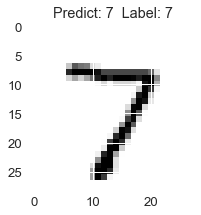

In [80]:
import numpy as np

# 10 개의 수를 더하면?
one_pred = pred_result[0]
print(one_pred.sum())

# 혹시 가장 큰 수가 있는 첨자가 결과
one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
tmp = "Predict: " + str(one) + "  Label: " + str(y_test[0])
plt.title(tmp) # 그래프 위 이미지 출력
_ = plt.imshow(x_test[0], cmap='Greys')

In [81]:
###############################################
# 간단한 자료 처리
import numpy as np

x = np.array([2, 3, 254, 5, 6, 3]) #1차원 배열
x = x / 255.0
print(x)

x = x.reshape(2, 3) # 2행 3열 2차원 배열로 전환
print(x)

x = x.flatten  #다시 1차원으로 평평하게
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
<built-in method flatten of numpy.ndarray object at 0x000001CB56E1D800>


In [82]:
from random import sample
import numpy as np

# x_test로 직접 결과 처리
pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

# 원핫 인코딩을 일반 데이터로 변환
pred_labels = np.argmax(pred_result, axis=1)
# 예측한 답 출력
print(pred_labels)
# 실제 정답 출력
print(y_test)
###############################################

(10000, 10)
[3.5793266e-09 2.2164633e-10 7.3493645e-08 7.0006208e-05 6.2903898e-13
 4.1045425e-08 4.9701295e-14 9.9992979e-01 5.0479003e-09 9.0867715e-08]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


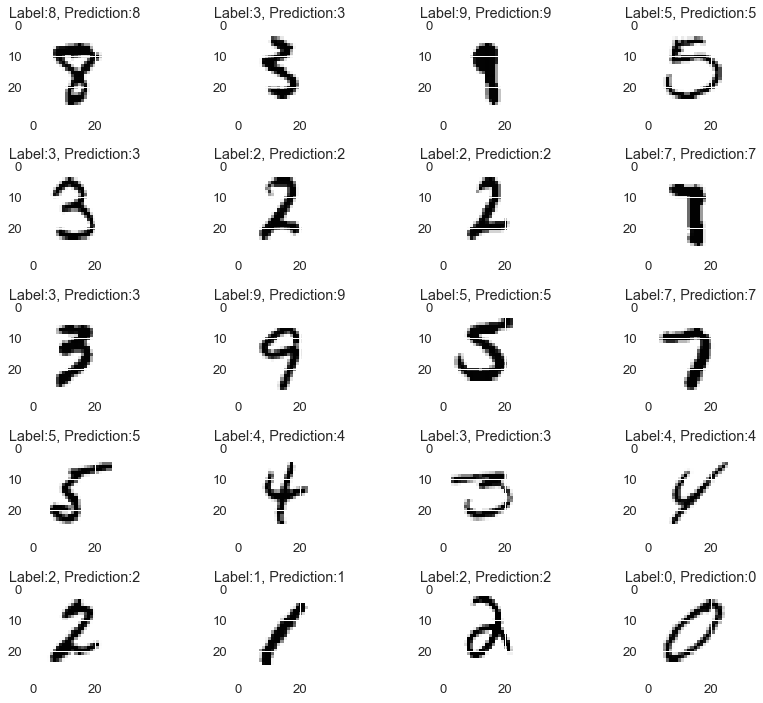

In [83]:
###############################################
from random import sample
import numpy as np

# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

#랜덤하게 20개의 훈련용 자료를 예측 값과 정답, 그림을 그려 보자.
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)), nrows * ncols)) # 출력할 첨자 선정

# 임의의 20개 그리기
count = 0
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    # 예측이 틀린 것은 파란색으로 그리기 
    cmap = 'Greys' if ( pred_labels[n] == y_test[n]) else 'Blues'
    plt.imshow(x_test[n].reshape(28, 28), cmap=cmap, interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

정답이 틀린 수 211
[5642, 3893, 1319, 3218, 9015, 1522, 9692, 1717, 8277, 2927, 4248, 6847, 1226, 3749, 2043, 8456, 3906, 1790, 9716, 2654]


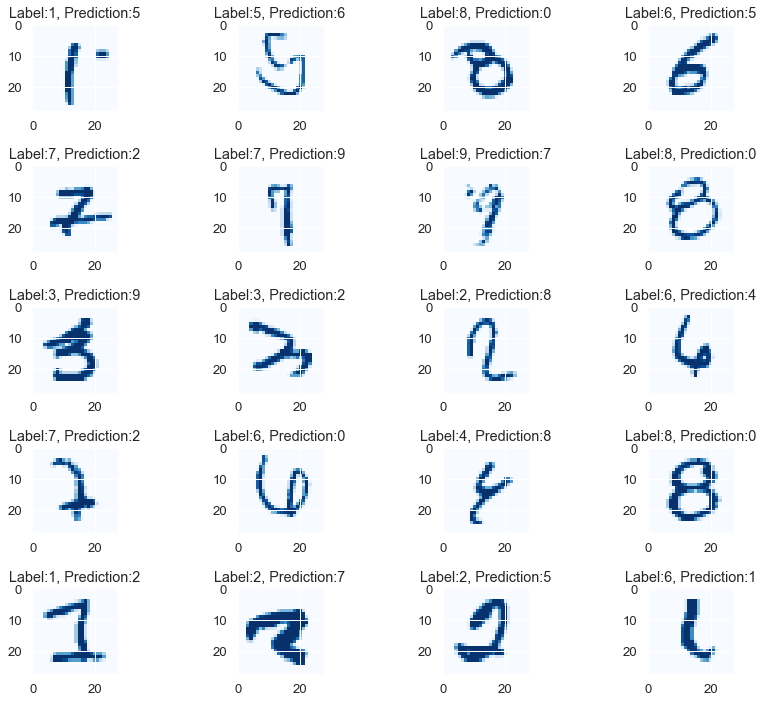

In [84]:
from random import sample
import numpy as np

###############################################
# 예측 틀린 것 첨자를 저장할 리스트
mispred = []
# 예측한 softmax의 확률이 있는 리스트 pred_result
pred_result = model.predict(x_test)

# 실제 예측한 정답이 있는 리스트 pred_labels
pred_labels = np.argmax(pred_result, axis=1)

mispred = [n for n in range(0, len(y_test)) if pred_labels[n] != y_test[n]]
# for n in range(0, len(y_test)):
#     if pred_labels[n] != y_test[n]:
#         mispred.append(n)
print('정답이 틀린 수', len(mispred))

# 랜덤하게 틀린 것 20개의 첨자 리스트 생성
samples = sample(mispred, 20)
print(samples)

# 틀린 것 20개 그리기
count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Blues', interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()
###############################################

인공 신경망 퍼셉트론의 이해
![NEW1](img/NEW1.png)


INPUT의 값은 Bias의 B로 조절해 y 값으로 출력된다 !
    
    편향(bias) : 편향을 조절해 출력을 맞춤(조절)
    
![NEW2](img/NEW2.png)
  
  
입력값 X와 가중치 W 그리고 Bias의 값으로 하나의 값을 만든 뒤

함수에 넣어 y값을 출력

여기서 나오는 함수를 활성화 함수라고 함



활성화 함수의 종류

    Sigmoid
        -s자 형태의 곡선이라는 의미
        -곡선이라는 의미
        -0부터 1 사이의 값을 출력 값으로 가지고 있다!
![NEW3](img/NEW3.png)



    ReLU
        -Rectified(정류된) Linear Unit(선형 함수, y=x를 의미)
            선형 함수를 정류하여 0이하는 모두 0으로 한 함수
            max(x, 0) <- 양수만 사용
            
        -층이 깊어질수록 (deep) 많이 사용
            양수를 그대로 반환하므로 값의 왜곡이 적어지는 효과
            

여러 개의 뉴런으로 구성된 행렬 계산
![NEW4](img/NEW4.png)

위 계산을 적용한 사례
![NEW5.png](img/NEW5.png)

입력에 x1에는 1 , x2에는 2가 들어감

가중치는 (1,2,3 / 4,5,6)

x1의 입력값과 x1의 첫 번째 가중치를 곱하고 x2의 입력값과 x2의 첫 번째 가중치 곱한 것을 더한 것이 Y1의 출력 값

다른 것도 가중치만 변화 시키고 곱하고 더하면 됨



하나의 뉴런으로 구성된 계산
![NEW6.png](img/NEW6.png)




뉴런이 층과 가중치 층
![NEW7.png](img/NEW7.png)

    -input 층에서는 뉴런이 존재하지 않는다!

활성화 함수를 그래프로 그려보자

In [85]:
import tensorflow as tf
tf.__version__

'2.6.1'

In [86]:
#무리수 e의 값
import numpy as np
np.e

2.718281828459045

In [87]:
a = np.linspace(0, 10, 10)
a

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

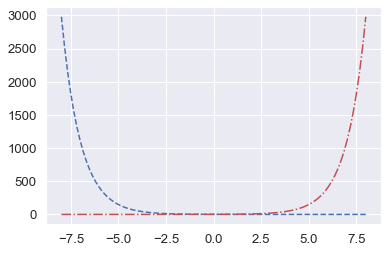

In [88]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--', label='np.exp(-x)');
plt.plot(x, np.exp(x), 'r-.', label='np.exp(x)');

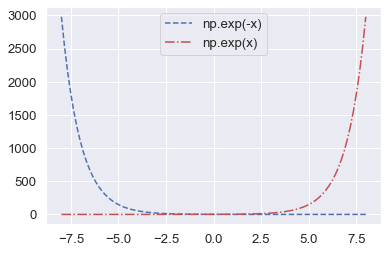

In [89]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--', label='np.exp(-x)');
plt.plot(x, np.exp(x), 'r-.', label='np.exp(x)');
#범례추가
plt.legend(loc='best');

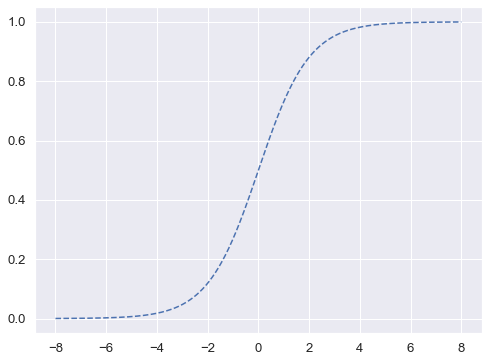

In [90]:

import numpy as np
import matplotlib.pyplot as plt

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수 그리기
#시그모이드는 0부터 1까지 사이의 값을 출력값으로 가지고 있음
x = np.linspace(-8, 8, 1000)
plt.figure(figsize=(8, 6)) 
plt.plot(x, sigm_func(x), 'b--');

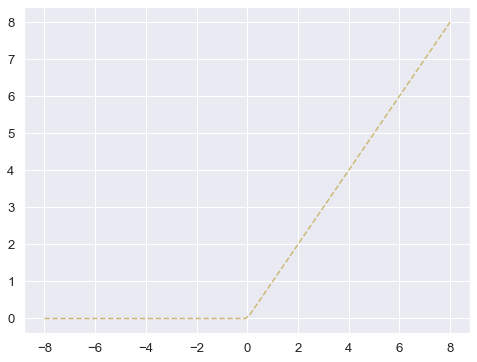

In [91]:
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

# ReLU 함수 그리기
# ReLu는 양수만 반환 음수는 0
plt.figure(figsize=(8, 6)) 
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x), 'y--')

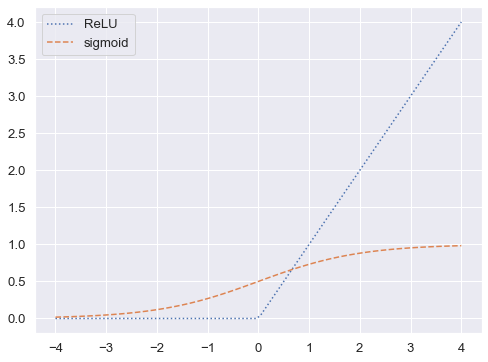

In [92]:
#시그모이드 렐루 같이 그려보기
import numpy as np
import matplotlib.pylab as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(8, 6)) 
x = np.linspace(-4, 4, 100)
y = np.linspace(-0.2, 2, 100)

plt.plot(x, relu_func(x), linestyle=':', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left')

활성화 함수는 ReLu, Sigmoid말고도 여러가지가 있음

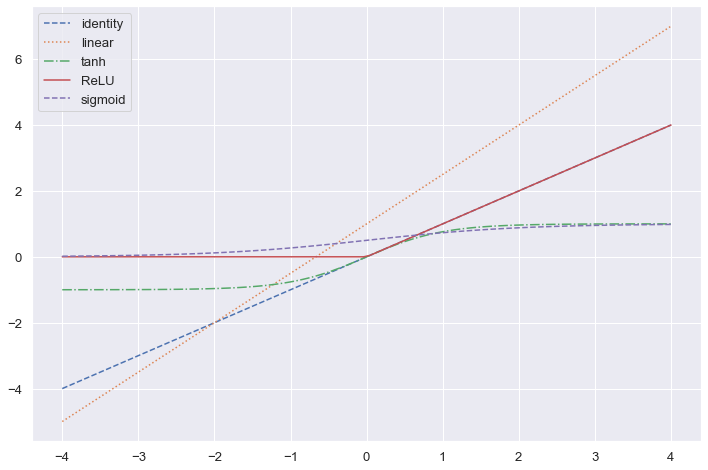

In [93]:
import numpy as np
import matplotlib.pylab as plt
 
def identity_func(x): # 항등함수
    return x
  
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능

def tanh_func(x): # TanH 함수
    return np.tanh(x)

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x) 
    #return (x>0)*x # same

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 그래프 그리기
plt.figure(figsize=(12, 8)) 
x = np.linspace(-4, 4, 100)

plt.plot(x, identity_func(x), linestyle='--', label="identity")
plt.plot(x, linear_func(x), linestyle=':', label="linear")
plt.plot(x, tanh_func(x), linestyle='-.', label="tanh")
plt.plot(x, relu_func(x), linestyle='-', label="ReLU")
plt.plot(x, sigm_func(x), linestyle='--', label="sigmoid")
plt.legend(loc='upper left');

뉴런의 행렬 계산 (위에서 나옴)

In [94]:
#위에서 나온 뉴런 행렬 계산
x = [[1, 2]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[ 9, 12, 15]])

In [95]:
x = [[6, 5]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48]])

In [96]:

x = [[6, 5], [4, 7], [5, 6], [6, 7]]
w = [[1, 2, 3], [4, 5, 6]]

y = tf.matmul(x, w)
y.numpy()

array([[26, 37, 48],
       [32, 43, 54],
       [29, 40, 51],
       [34, 47, 60]])

In [97]:
# 행렬의 순서를 바꾼 계산
#x = [[6, 5], [4, 7], [5, 6], [6, 7]]
#w = [[1, 2, 3], [4, 5, 6]]

w = [[1, 4], [2, 5], [3, 6]]
x = [[6, 4, 5, 6], [5, 7, 6, 7]]

y = tf.matmul(w, x)
y.numpy()

array([[26, 32, 29, 34],
       [37, 43, 40, 47],
       [48, 54, 51, 60]])

논리 게이트 AND or XOR 신경망 구현

우리가 아는 AND

    - 둘 모두 참이여야 참인 논리연산
    


![NEW1](img/NEW1.png)

여기서  IPNUT과 BIAS가 1이면 OUTPUT이 1이 되도록 해야함

#### 아래 코드는  INPUT이 2개 Bias가 1개인 상황

In [98]:
# tf.keras 를 이용한 AND 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3), loss='mse')
model.summary()

#코드 실행후 결과 값 해석
#Param은 input + bias의 값

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [99]:
#epochs = 100 은 100번 훈련하라는 의미
history = model.fit(x, y, epochs=100, batch_size=1)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.3007
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2885
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2786
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2746
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2709
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2677
Epoch 9/100
4/4 [==============================] - 0s 997us/step - loss: 0.2648
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2620
Epoch 11/100
4/4 [==============================] - 0s 997us/step - loss: 0.2598
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 13/100
4/4 [==============================] - 0s 1m

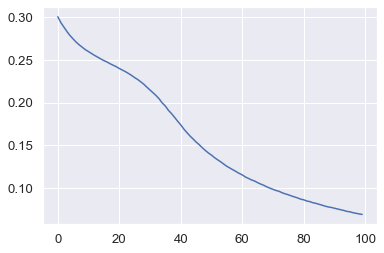

In [100]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

#코드 실행 후 해석
#100으로 가면서 낮아질수록 좋다!

In [101]:
#1에 가까울수록 비스무리한 정답
model.predict(x)

array([[0.6652611 ],
       [0.26464748],
       [0.2651996 ],
       [0.06134719]], dtype=float32)

In [102]:
#가중치 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[1.7059451],
       [1.7087803]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-2.7278965], dtype=float32)>


In [103]:
#배열0은 가중치1 1은 가중치2
model.weights[0].numpy()

array([[1.7059451],
       [1.7087803]], dtype=float32)

In [104]:
#bias
model.weights[1]

<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-2.7278965], dtype=float32)>

우리가 아는 OR!
    
    -하나만 참이여도 참으로 하는 논리 연산

In [105]:
# tf.keras 를 이용한 OR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

history = model.fit(x, y, epochs=500, batch_size=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


4/4 [==============================] - 0s 4ms/step - loss: 0.4940
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.4300
Epoch 3/500
4/4 [==============================] - 0s 1ms/step - loss: 0.3605
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2984
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2530
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2231
Epoch 7/500
4/4 [==============================] - 0s 1ms/step - loss: 0.2038
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1912
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0.1826
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1763
Epoch 11/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1712
Epoch 12/500
4/4 [==============================] - 0s 2ms/step - loss: 0.1668
Epoch 13/500
4/4 [==============================] - 0s 1ms/step - loss: 0

4/4 [==============================] - 0s 3ms/step - loss: 0.0360
Epoch 105/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 106/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0352
Epoch 107/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 108/500
4/4 [==============================] - ETA: 0s - loss: 0.027 - 0s 3ms/step - loss: 0.0344
Epoch 109/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 110/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0336
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0333
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 114/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 115/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 116/500
4/4 [===========

Epoch 206/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 207/500
4/4 [==============================] - 0s 997us/step - loss: 0.0156
Epoch 208/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0153
Epoch 211/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0149
Epoch 215/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 216/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 217/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 218/500
4/4 [===================

4/4 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 309/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 310/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 313/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 316/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 317/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 318/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 319/500
4/4 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 320/500
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 410/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 411/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 413/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 415/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 417/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 418/500
4/4 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 419/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 420/500
4/4 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 421/500
4/4 [==============================] - 0

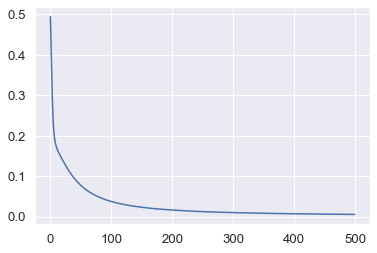

In [106]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [107]:
model.predict(x)
#AND와 결과가 다르다.

array([[0.99934983],
       [0.9323014 ],
       [0.9323194 ],
       [0.10985386]], dtype=float32)

우리가 아는 XOR

    -둘 다 거짓이면 거짓
    -둘 다 참이면 참
    - 하나만 참이고 하나만 거짓이면 참
    
    
![NEW8.PNG](img/NEW8.PNG)
    

In [108]:

# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Dense 층
    
    -가장 기본적인 층
    -인자 units(뉴런 수), activation(활성화 함수)
    -인자 input_shape
        첫 번째 층에서만 정의
        입력의 차원을 명시
            -(2,)
            -2개의 입력을 받는 1차원

In [109]:
history = model.fit(x, y, epochs=1500, batch_size=1)

Epoch 1/1500
4/4 [==============================] - 0s 997us/step - loss: 0.2905
Epoch 2/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2830
Epoch 3/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 4/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2744
Epoch 5/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2714
Epoch 6/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2701
Epoch 7/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2690
Epoch 8/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2683
Epoch 9/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2686
Epoch 10/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2672
Epoch 11/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2669
Epoch 12/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 13/1500
4/4 [============================

4/4 [==============================] - 0s 1ms/step - loss: 0.2582
Epoch 103/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2579
Epoch 104/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2586
Epoch 105/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2586
Epoch 106/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2585
Epoch 107/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2580
Epoch 108/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2579
Epoch 109/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2575
Epoch 110/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2581
Epoch 111/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2580
Epoch 112/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2580
Epoch 113/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2578
Epoch 114/1500
4/4 [=======================

4/4 [==============================] - 0s 1ms/step - loss: 0.2446
Epoch 203/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2444
Epoch 204/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2441
Epoch 205/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2439
Epoch 206/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2429
Epoch 207/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2435
Epoch 208/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2427
Epoch 209/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2429
Epoch 210/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2420
Epoch 211/1500
4/4 [==============================] - 0s 997us/step - loss: 0.2424
Epoch 212/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2419
Epoch 213/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2412
Epoch 214/1500
4/4 [=====================

Epoch 303/1500
4/4 [==============================] - 0s 997us/step - loss: 0.2132
Epoch 304/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2128
Epoch 305/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2125
Epoch 306/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2118
Epoch 307/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2119
Epoch 308/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2112
Epoch 309/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2113
Epoch 310/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2106
Epoch 311/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2107
Epoch 312/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2105
Epoch 313/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2101
Epoch 314/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2097
Epoch 315/1500
4/4 [======

4/4 [==============================] - 0s 1ms/step - loss: 0.1855
Epoch 404/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1852
Epoch 405/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1849
Epoch 406/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1845
Epoch 407/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1844
Epoch 408/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1838
Epoch 409/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1834
Epoch 410/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1836
Epoch 411/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1833
Epoch 412/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1831
Epoch 413/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1828
Epoch 414/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1824
Epoch 415/1500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.1353
Epoch 505/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1347
Epoch 506/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1335
Epoch 507/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1327
Epoch 508/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 509/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1302
Epoch 510/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1295
Epoch 511/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1282
Epoch 512/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1271
Epoch 513/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1262
Epoch 514/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.1251
Epoch 515/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.1240
Epoch 516/1500
4/4 [=======================

Epoch 605/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0466
Epoch 606/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 607/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0456
Epoch 608/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0452
Epoch 609/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 610/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0443
Epoch 611/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 612/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0434
Epoch 613/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0429
Epoch 614/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0425
Epoch 615/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0421
Epoch 616/1500
4/4 [==============================] - ETA: 0s - loss: 0.040 - 0s 3ms/step - loss: 0.0417
Epoc

4/4 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 706/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 707/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0203
Epoch 708/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 709/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 710/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 711/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 712/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0197
Epoch 713/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 714/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 715/1500
4/4 [==============================] - 0s 997us/step - loss: 0.0193
Epoch 716/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0192
Epoch 717/1500
4/4 [=====================

4/4 [==============================] - 0s 2ms/step - loss: 0.0123
Epoch 806/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 807/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 808/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 809/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 810/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 811/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 812/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 813/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 814/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 815/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 816/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 817/1500
4/4 [=======================

Epoch 906/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 907/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 908/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 909/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 910/1500
4/4 [==============================] - 0s 997us/step - loss: 0.0084
Epoch 911/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 912/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 913/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 914/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 915/1500
4/4 [==============================] - 0s 997us/step - loss: 0.0083
Epoch 916/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 917/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 918/1500
4/4 [====

4/4 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 1007/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 1008/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 1009/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 1010/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 1011/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 1012/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 1013/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1014/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 1015/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1016/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 1017/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 1018/1500
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1107/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 1108/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1109/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 1110/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1111/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1112/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1113/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 1114/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1115/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1116/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 1117/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 1118/1500
4/4 [===========

4/4 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 1206/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1207/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1208/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 1209/1500
4/4 [==============================] - 0s 4ms/step - loss: 0.0042
Epoch 1210/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1211/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 1212/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 1213/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 1214/1500
4/4 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 1215/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1216/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 1217/1500
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 1306/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1307/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1308/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1309/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1310/1500
4/4 [==============================] - 0s 997us/step - loss: 0.0036
Epoch 1311/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1312/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1313/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1314/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 1315/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1316/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 1317/1500
4/4 [=========

4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1405/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1406/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1407/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 1408/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 1409/1500
4/4 [==============================] - 0s 997us/step - loss: 0.0031
Epoch 1410/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1411/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 1412/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1413/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 1414/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1415/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 1416/1500
4/4 [=========

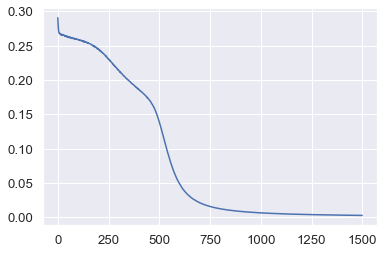

In [110]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [111]:
model.predict(x)

array([[0.04666793],
       [0.95229864],
       [0.9377385 ],
       [0.05353558]], dtype=float32)

In [112]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)
    print()

<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.570035,  4.940372],
       [-5.712017, -4.741073]], dtype=float32)>

<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([-3.108122,  2.344615], dtype=float32)>

<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.3794446],
       [-7.115352 ]], dtype=float32)>

<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([3.304765], dtype=float32)>



In [113]:
model.weights[0]

<tf.Variable 'dense_4/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.570035,  4.940372],
       [-5.712017, -4.741073]], dtype=float32)>

In [114]:
model.weights[1]

<tf.Variable 'dense_4/bias:0' shape=(2,) dtype=float32, numpy=array([-3.108122,  2.344615], dtype=float32)>

In [115]:
model.weights[2]

<tf.Variable 'dense_5/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 7.3794446],
       [-7.115352 ]], dtype=float32)>

In [116]:
model.weights[3]

<tf.Variable 'dense_5/bias:0' shape=(1,) dtype=float32, numpy=array([3.304765], dtype=float32)>

#### AI 손실함수와 경사하강법

단순 선형 회귀 분석(Simple Linear Regression Analysis)

     - 입력: 특징이 하나
     - 출력: 하나의 값
         키로 몸무게 추정
         
다중 선형 회귀 분석(Multiple Linear Regression Analysis)

    -입력 : 특징이 여러 개, 출력: 하나의 값
        역세권, 아파트 평수, 주소로 아파트값을 추정
        
로지스틱 회귀(Logistic Regression)

    - 이진 분류(Binary Classification)
    - 입력 : 하나 또는 여러 개, 출력: 0 아니면 1
        타이타닉의 승객 정보로 죽음을 추정
        
        
        
![NEW9.png](IMG/NEW9.png)

<용어정리>

    가설(Hypothesis)
     - 가중치(weight)와 편향(bias)
     - 기울기와 절편
    손실 함수(Loss Function)
     - MSE(Mean Square Error 평균 제곱 오차)
     - Categorical crossentropy
     
    경사 하강법(Gradient Descent)
     - 내리막 경사 따라가기
     
    학습률(learning rate)
     - 대표적인 하이퍼패러미터
         
         패리미터 : 학습에 의해 결정되는 값
         하이퍼패러미터 : 프로그래머가 결정하는 값 (사진에서 w와 b)
     
     

#### 선형회귀

    -Linear regression
        데이터의 경향성을 가장 잘 설명하는 하나의 직선을 예측하는 방법
        Y = ax + b
            기울기 a와 절편인 b를 구하는 것
    - 사례
        국어와 수학 성적
        키와 몸무게
        치킨과 맥주의 판매량
        기저귀와 맥주의 판매량
        
        
    - 딥러닝 분야에서
        - 선형 회귀
            Y = wX + b
                가중치 w와 편향인 b를 구하는 것
                
                
선형 회귀 문제 사례

    공부 시간이 x라면, 점수는 y
    
    알려준 데이터로부터 x와 y의 관계를 유추
        - 학생이 6시간을 공부하였을 때의 성적
        - 그리고 7시간, 8시간을 공부하였을 때의 성적을 예측
        
 ![NEW10.png](IMG/NEW10.png)
 
 
 
     머신 러닝 : y와 x간의 관계를 유추한 식을 가설
  ![NEW11.png](IMG/new11.png)
      
      (그래프를 예측하는 것)
      
     선형회귀(딥러닝 알고리즘)에서 해야할 일은 결국 적절한 w와 b를 찾아내는 것
     
     
     
 #### 그렇다면 머신 러닝은 w와 b를 어떻게 찾아야 하는가?
 
     -손실 함수를 정의
         실제 값과 가설로부터 얻은 예측 값의 오차를 계산하는 식
     -손실 함수 값을 최소화하는 최적의 w와 b를 찾아내려고 노력
   
   
 손실 함수(Loss funciton)
     
     - 목적 함수(Objective function), 비용 함수 (코스트 펑션)라고도 부름
     - 실제 값과 에측 값에 대한 오차에 대한 식
         예측 값의 오차를 줄이는 일에 최적화 된 식
         
     - 평균 제곱 오차 (Mean Squared Error, MSE) 등을 사용
     
     
     
     
 W와 b의 값을 찾아내기 위해 오차의 크기를 측정할 방법이 필요
 
 ![NEW12.png](IMG/new12.png)
 ![NEW13.png](IMG/new13.png)
 
 
 
 
 평균 제곱 오차를 w와 b에 의한 비용 함수로 재정의
     
     - 모든 점 들과의 오차가 클수록 평균 제곱 오차는 커지며 작아질수록 평균 제곱 오차는 작아짐
     
 
 평균 제곱 오차
 
     - cost(W,b)를 최소가 되게 만드는 w와 b를 구하면
     ★결과적으로 y와 x의 관계를 가장 잘 나타내는 직선을 그릴 수 잇게 됨★
     
     
     

#### 최적화 과정 ( Optimizer)

    머신 러닝에서 학습
        - 최적화 알고리즘
    
        - 적절한 W와 b를 찾아내는 과정
            경사 하강법
                -비용 함수의 값을 최소로 하는 W와 b를 찾는 방법
                -경사 따라 내려 오기
                

    손실과 가중치 w을 대응한 그림
        - 항상 2차 함수 그래프와 비슷한 모양을 함(같진 않음)
    
    블록 문제에는 기울기가 정확하게 0인 지점인 최소값이 하나만 존재
        - 이 최소값에서 손실 함수가 수렴
            결국 기울기를 구해야함
![NEW14.png](IMG/new14.png)


#### 경사하강법의 1단계

    - 시작 값(시작점)을 선택
        시작점은 별로 중요하지 않음
        따라서 많은 알고리즘에서는 0으로 설정하거나 임의의 값을 선택
    - 시작점에서 손실 곡선의 기울기를 계산
        단일 가중치에 대한 손실의 기울기는 미분 값과 같음
        
        
        
    - 기울기가 0인 지점을 찾기 위해
    
        현재의 기울기가 음수이면 다음 가중치 값은 현재의 값보다 크게 조정
        
        -> 다음 가중치 값을 어떻게 결정하는가?
        
            기울기에 학습률(스칼라)를 곱하여 다음 지정을 결정
            ex) 기울기 -2.5 / 학습률 0.01
                = w = w-(-2.5 * 0.01) = w + 0.025
                경사하강법 알고리즘은 이전 지점으로부터 0.025 떨어진 지점을 다음 지점으로 결정
    - 학습률의 값
        너무 작게 설정하면 학습 시간이 매우 오래 걸림
            반대로 학습률을 너무 크게 설정하면 다음 지점이 곡선의 최저점을 무질서하게 이탈할 우려가 있음
            
 ![NEW15.png](IMG/new15.png)
 
 
 Cost가 가장 최소값을 가지게 하는 W를 찾는 일
 
 y = Wx라는 가설 H9x)
    
        - 비용 함수의 값 cost(W)
            설명의 편의를 위해 편향 b가 없이 단순한 가중치 w만을 사용
            
            
![NEW16.png](IMG/new16.png)


  식을 세우고  접선의 기울기가 0이 될 때까지 반복
  
  접선의 기울기가 양수일때 가중치 감소 / 음수일때 가중치 증가로 기울기 조절
  
![NEW17.png](IMG/new17.png)


In [117]:

import tensorflow as tf

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = tf.keras.models.Sequential([
    #                   출력, 입력=(*, 1)           그대로 출력
    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

확률적 경사하강법

    -optimizer = 'SGD'
        경사하강법의 계산량을 줄이기 위해 확률적 방법으로 경사하강법을 사용
            -전체를 게산하지 않고 확률적으로 일부 샘플로 계산
            
mae

    - 평균 절대 오차
        모든 예측과 정답과의 오차 합의 평균
        n = 오차의 갯수
        시그마 = 합을 나타내는 기호
mse

    -오차 평균 제곱합
             모든 예측과 정답과의 오차 제곱 합의 평균

In [118]:

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse', metrics=['mae', 'mse'])
#model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [119]:
# 모델을 표시(시각화)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [120]:

# ④ 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장 
history = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 404ms/step - loss: 97.2680 - mae: 9.0031 - mse: 97.2680
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 67.5526 - mae: 7.4726 - mse: 67.5526
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 46.9334 - mae: 6.1978 - mse: 46.9334
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 32.6258 - mae: 5.1359 - mse: 32.6258
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 22.6977 - mae: 4.2515 - mse: 22.6977
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 15.8084 - mae: 3.5148 - mse: 15.8084
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 11.0278 - mae: 2.9013 - mse: 11.0278
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 7.7102 - mae: 2.3903 - mse: 7.7102
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 5.4079 - mae: 1.9647 - mse: 5.4079
Epoch 10/500
1/1 [============

1/1 [==============================] - 0s 6ms/step - loss: 0.1276 - mae: 0.2973 - mse: 0.1276
Epoch 78/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1269 - mae: 0.2964 - mse: 0.1269
Epoch 79/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1261 - mae: 0.2955 - mse: 0.1261
Epoch 80/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1253 - mae: 0.2947 - mse: 0.1253
Epoch 81/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1246 - mae: 0.2938 - mse: 0.1246
Epoch 82/500
1/1 [==============================] - 0s 4ms/step - loss: 0.1238 - mae: 0.2929 - mse: 0.1238
Epoch 83/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1231 - mae: 0.2920 - mse: 0.1231
Epoch 84/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1224 - mae: 0.2911 - mse: 0.1224
Epoch 85/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1216 - mae: 0.2903 - mse: 0.1216
Epoch 86/500
1/1 [==============================

1/1 [==============================] - 0s 7ms/step - loss: 0.0814 - mae: 0.2374 - mse: 0.0814
Epoch 153/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0809 - mae: 0.2367 - mse: 0.0809
Epoch 154/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.2360 - mse: 0.0804
Epoch 155/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0799 - mae: 0.2353 - mse: 0.0799
Epoch 156/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0795 - mae: 0.2346 - mse: 0.0795
Epoch 157/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0790 - mae: 0.2339 - mse: 0.0790
Epoch 158/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0785 - mae: 0.2332 - mse: 0.0785
Epoch 159/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0780 - mae: 0.2325 - mse: 0.0780
Epoch 160/500
1/1 [==============================] - 0s 16ms/step - loss: 0.0776 - mae: 0.2318 - mse: 0.0776
Epoch 161/500
1/1 [======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0519 - mae: 0.1896 - mse: 0.0519
Epoch 228/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0516 - mae: 0.1891 - mse: 0.0516
Epoch 229/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0513 - mae: 0.1885 - mse: 0.0513
Epoch 230/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0510 - mae: 0.1879 - mse: 0.0510
Epoch 231/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0507 - mae: 0.1874 - mse: 0.0507
Epoch 232/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0504 - mae: 0.1868 - mse: 0.0504
Epoch 233/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0501 - mae: 0.1862 - mse: 0.0501
Epoch 234/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0498 - mae: 0.1857 - mse: 0.0498
Epoch 235/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0495 - mae: 0.1851 - mse: 0.0495
Epoch 236/500
1/1 [=======================

Epoch 303/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0329 - mae: 0.1510 - mse: 0.0329
Epoch 304/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0327 - mae: 0.1505 - mse: 0.0327
Epoch 305/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0325 - mae: 0.1501 - mse: 0.0325
Epoch 306/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0323 - mae: 0.1496 - mse: 0.0323
Epoch 307/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0321 - mae: 0.1492 - mse: 0.0321
Epoch 308/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0319 - mae: 0.1487 - mse: 0.0319
Epoch 309/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0317 - mae: 0.1483 - mse: 0.0317
Epoch 310/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0316 - mae: 0.1478 - mse: 0.0316
Epoch 311/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0314 - mae: 0.1474 - mse: 0.0314
Epoch 312/500
1/1 [=========

1/1 [==============================] - 0s 5ms/step - loss: 0.0210 - mae: 0.1206 - mse: 0.0210
Epoch 379/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0209 - mae: 0.1202 - mse: 0.0209
Epoch 380/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0207 - mae: 0.1199 - mse: 0.0207
Epoch 381/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0206 - mae: 0.1195 - mse: 0.0206
Epoch 382/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0205 - mae: 0.1191 - mse: 0.0205
Epoch 383/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0204 - mae: 0.1188 - mse: 0.0204
Epoch 384/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0202 - mae: 0.1184 - mse: 0.0202
Epoch 385/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0201 - mae: 0.1181 - mse: 0.0201
Epoch 386/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0200 - mae: 0.1177 - mse: 0.0200
Epoch 387/500
1/1 [=======================

1/1 [==============================] - 0s 4ms/step - loss: 0.0134 - mae: 0.0963 - mse: 0.0134
Epoch 454/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0133 - mae: 0.0960 - mse: 0.0133
Epoch 455/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0132 - mae: 0.0957 - mse: 0.0132
Epoch 456/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0131 - mae: 0.0954 - mse: 0.0131
Epoch 457/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0131 - mae: 0.0951 - mse: 0.0131
Epoch 458/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0130 - mae: 0.0949 - mse: 0.0130
Epoch 459/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0129 - mae: 0.0946 - mse: 0.0129
Epoch 460/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0128 - mae: 0.0943 - mse: 0.0128
Epoch 461/500
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - mae: 0.0940 - mse: 0.0128
Epoch 462/500
1/1 [=======================

In [121]:
# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실:', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 170ms/step - loss: 0.0106 - mae: 0.0917 - mse: 0.0106
손실: [0.01057305745780468, 0.09172385931015015, 0.01057305745780468]


In [122]:
type(history)

keras.callbacks.History

In [123]:
history.history['loss']

[97.26795196533203,
 67.5525894165039,
 46.933372497558594,
 32.62577819824219,
 22.697675704956055,
 15.80842399597168,
 11.027764320373535,
 7.710216522216797,
 5.407891273498535,
 3.810009479522705,
 2.700929880142212,
 1.9310195446014404,
 1.3964558839797974,
 1.0251944065093994,
 0.7672478556632996,
 0.5879307985305786,
 0.46317410469055176,
 0.3762778341770172,
 0.31565403938293457,
 0.2732624411582947,
 0.24352364242076874,
 0.22256605327129364,
 0.20770341157913208,
 0.1970721185207367,
 0.1893787980079651,
 0.18372578918933868,
 0.17949050664901733,
 0.17624081671237946,
 0.17367687821388245,
 0.17159052193164825,
 0.16983747482299805,
 0.16831746697425842,
 0.16696101427078247,
 0.16571980714797974,
 0.16456037759780884,
 0.1634596437215805,
 0.16240112483501434,
 0.16137389838695526,
 0.16037006676197052,
 0.15938401222229004,
 0.15841232240200043,
 0.15745209157466888,
 0.1565016657114029,
 0.1555597186088562,
 0.1546252965927124,
 0.15369775891304016,
 0.15277668833732605,

In [124]:

# x = [3.5, 5, 5.5, 6]의 예측 
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6])
# 예측 값만 1차원으로 
print(pred.flatten())
print(pred.squeeze())

[[ 6.953315]
 [ 9.828237]
 [10.786544]
 [11.744851]]
[ 6.953315  9.828237 10.786544 11.744851]
[ 6.953315  9.828237 10.786544 11.744851]


In [125]:
model.weights[0].numpy()

array([[1.9166147]], dtype=float32)

In [126]:
#손실과 예측 시각화
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse'])

Text(0, 0.5, 'loss')

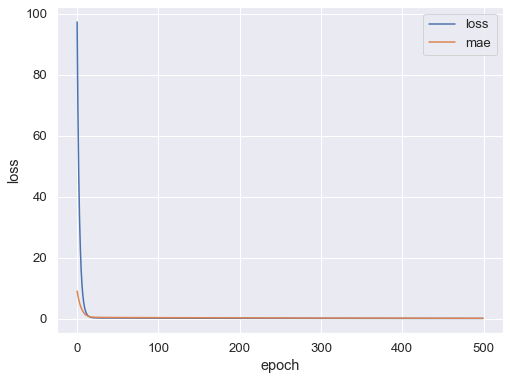

In [127]:
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'y')

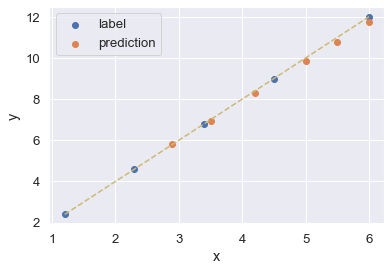

In [128]:
#예측 값 시각화
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

# 그래프 그리기
fig = plt.figure(figsize=(6, 4)) 

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

#### 선형회귀 Y = 2x + 1 예측

In [129]:
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가 
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)  
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄): 훈련반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[2:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[2:]).flatten())

Targets(정답): [5 7 9]
Predictions(예측): [4.999197  6.9978876 8.996577 ]


#### 보스톤 주택 가격 예측

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.6.1'

#### 케라스로 예측 순서

1. 케라스 패키지 임포트
    
    - import tensorflow as tf
    - import numpy as np

2. 데이터 지정
    
    - x = numpy.array([0,1,2,3,4])
    - y = numpy.array([1,3,5,7,9]) // y = x * 2 + 1

3. 인공신경망 모델 구성

    - model = tf.keras.models.Sequemtial()
    - model.add(tf.keras.layers.Dense(출력수, input_shape=(입력수,)))
    
4. 최적화 방법과 손실 함수 지정해 인공신공명 모델 생성


    - model.compile(' SGD ' , ' mse ')

5. 생성된 모델로 훈련 데이터 학습

    - model.fit(...)
    
6. 성능 평가

    - model.evaulate()
    
    
7. 테스트 데이터로 결과 예측

    -model.predict()
    
    
    
 #### 주요 활성화 함수
 
     - ReLU
     
     -Sigmoid
     
     -Tanh

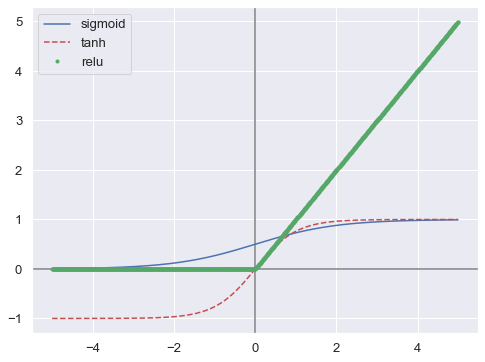

In [131]:

# 활성화 함수
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.figure(figsize=(8, 6)) 

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

#### 보스톤 주택 가격 예측

    1978년 보스톤 지역 주택 가격 데이터 셋
    
        - 506개 타운의 주택 가격 중앙 값, 천 달러 단위
        -범죄율, 방 수, 고속도로 까지 거리 등 13가지 특성
        
        데이터 셋은 학습 데이터와 테스트 데이터로 구성
            -학습 데이터
                404개
            
            -테스트 데이터
                102개

In [132]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(train_X.shape, test_X.shape)
print(train_X[0])
print(train_Y[0])

(404, 13) (102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


#### 보스턴 주택가격 데이터는 행이 506, 열이 13개

    -마지막 변수 주택가격(중위값)을 나머지 13개 변수로 에측하는 문제
    -특징(속성)
    
        CRIM : 자치시(town) 별 1인당 범죄율
        ZN : 25,000 평방피트를 초과하는 거주지역의 비율
        INDUS : 비소매상업지역이 점유하고 있는 토지의 비율
        CHAS : 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
        NOX : 10ppm 당 농축 일산화질소
        RM : 주택 1가구당 평균 방의 개수
        AGE : 1940년 이전에 건축된 소유주택의 비율
        DIS : 5개의 보스턴 직업센터까지의 접근성 지수
        RAD : 방사형 도로까지의 접근성 지수
        TAX : 10,000 달러 당 재산세율
        PTRATIO : 자치시(twon)별 학생/교사 비율
        B  : 1000(BK-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함
        LSTAT : 모집단의 하위계층의 비율(%)
        
    - 정답
        MEDV : 주택가격(중앙값) (단위 : $1,000)

#### 자료의 표준화

표준화의 필요

    - 특성의 단위가 다름
        비율, 0/1, 양수 등
    - 표준화(standardization)가 학습 효율에 좋음
    
표준화 방법

    - 학습 데이터:
        (train_X - 학습 데이터 평균) / 학습데이터 표준편차
        
    - 표준편차
        정규 분포를 가정
    -테스트 데이터
    (test_X - 학습 데이터 평균) / 학습데이터 표준편차
        테스트데이터가 정규 분포를 가정할 수 없으므로
        
   
        

In [133]:

# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


#### 딥러닝 모델

    총 4개의 층
    
        -출력 층은 회귀 모델, 주택 가격이므로 1
        
    최적화
        -학습률
            Ir = 0.07
            
        -손실 함수
        
            mse

In [134]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
#model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_9 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_10 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#### 배치 사이즈와 검증 데이터

    위에서 트레이닝데이터 + 테스트데이터가 Data set이라고 했다.
    
    트레이닝 데이터는 2개로 나뉜다.
    
        - 트레이닝 데이터
        
        - 검증 데이터(validation)
            훈련과 검증용 데이터는 8:2 비율
            
     
    batch_size 
        훈련에서 가중치와 편향의 패러미터를 수정하는 데이터 단위 수
       

In [135]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 17ms/step - loss: 2.2376 - val_loss: 0.5624
Epoch 2/25
10/10 [==============================] - 0s 4ms/step - loss: 0.4700 - val_loss: 0.3932
Epoch 3/25
10/10 [==============================] - 0s 4ms/step - loss: 0.2735 - val_loss: 0.3097
Epoch 4/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1955 - val_loss: 0.1890
Epoch 5/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1443 - val_loss: 0.2084
Epoch 6/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1796 - val_loss: 0.1831
Epoch 7/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1614 - val_loss: 0.2066
Epoch 8/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1423 - val_loss: 0.2160
Epoch 9/25
10/10 [==============================] - 0s 5ms/step - loss: 0.1259 - val_loss: 0.1505
Epoch 10/25
10/10 [==============================] - 0s 4ms/step - loss: 0.1408 - val_loss: 0.1905
Epoch 11/25
10/10 


history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)


에폭스 = 25 <- 25번 훈련

batch_size = 32 데이터 단위 수

validation_split = 0.25  <- 404(트레이닝데이터수) * 0.25 = 101개

그러므로 순 학습용 자료 303개

#### 한 에폭스에서 반복 횟수

     - 가중치와 편향 수정 횟수
     
         int( 순 학습 샘플수 303개 / batch_size) + 1
         
         int(303/32) + 1 = 10

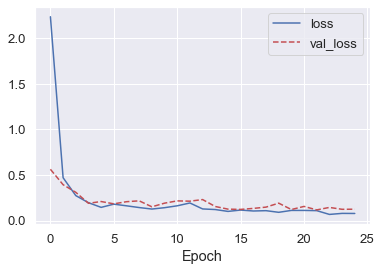

In [136]:

# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


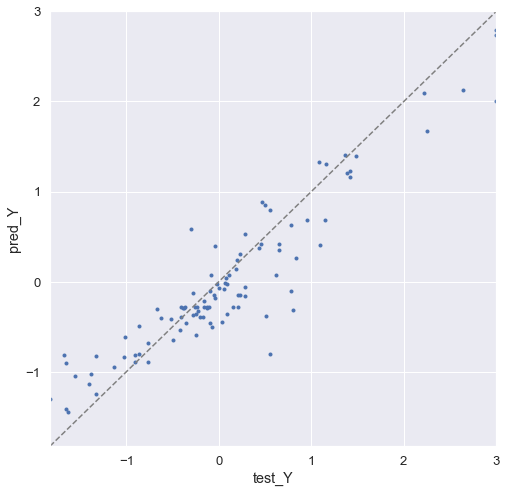

In [137]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'b.')
# x, y축 범위 설정
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".5")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

#각 점들이 점선의 대각선에 있어야 좋은 예측

#### 자동으로 학습 중단

    검증손실(val_loss)이 적을수록 테스트 평가의 손실도 적음
    검증 데이터에 대한 성적이 좋도록 유도
    
        -과적합에 의해 검증 손실이 증가하면 학습을 중단되도록 지정
        -함수 callbacks 사용
        
        
    일찍 멈춤 기능
    
        tf.keras.callbacks.EarlyStopping
            monitor = 'val_loss'
                -지켜볼 기준 값이 검증 손실
                
        patience = 3
                -기준 값이 되는 3회의 에폭스를 실행하는 동안 최고 기록을 갱신하지 못하면 ( 더 낮아지지 않으면) 학습 중단

In [138]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
10/10 [==============================] - 1s 88ms/step - loss: 1.5300 - val_loss: 0.5183
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3846 - val_loss: 0.3394
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3209 - val_loss: 0.3125
Epoch 4/25
10/10 [==============================] - 0s 19ms/step - loss: 0.2986 - val_loss: 0.5424
Epoch 5/25
10/10 [==============================] - 0s 8ms/step - loss: 0.2860 - val_loss: 0.4663
Epoch 6/25
10/10 [==============================] - 0s 22ms/step - loss: 0.2712 - val_loss: 0.2445
Epoch 7/25
10/10 [==============================] - 0s 14ms/step - loss: 0.1866 - val_loss: 0.2086
Epoch 8/25
10/10 [==============================] - 0s 12ms/step - loss: 0.1669 - val_loss: 0.2172
Epoch 9/25
10/10 [==============================] - 0s 8ms/step - loss: 0.1424 - val_loss: 0.1888
Epoch 10/25
10/10 [==============================] - 0s 14ms/step - loss: 0.1348 - val_loss: 0.1873
Epoch 11/25
1

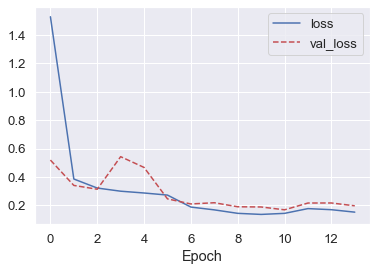

In [139]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [140]:

# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.4912


0.49123823642730713

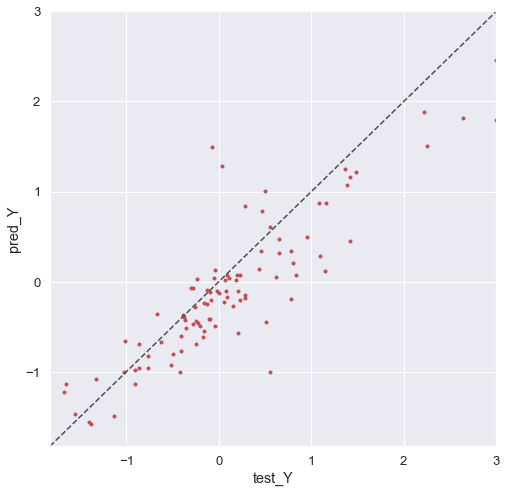

In [141]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(8,8))
plt.plot(test_Y, pred_Y, 'r.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

#### 이항(이진) 분류 및 다항 분류

    두 가지로 분류하는 방법!
    
    Input Layer 에서 Output Neuron을 거쳐 출력 값이 나올때 두 가지로 분류한다
    
    - PASS / FAIL
    
    - SPAM(나쁜메일) / HAM(좋은메일)
    
    - 긍정 과 부정 (좋은댓글인지 아닌지)
    
    - 로지스트 회귀라고도 부름
    
    
    결과 기술 방식
        - 4개의 결과
            일반 레이블 방식
                -[0, 1, 0, 1]
                
            one hot Encoding 방식
                -[[1,0],[0,1],[1,0],[0,1]]
                
                
![NEW18.PNG](img/NEW18.PNG)



### 시그모이드 함수

#### 이진분류 모델의 출력층에 주로 사용되는 활성화 함수

    - 0과 1사이의 값으로 출력
    
    - 출력 값이 특정 임계값(예를 들어 0.5) 이상이면 양성
        이하면 음성이라고 판별
        
        
### 소프트맥스 함수

#### 뉴런의 결과를 e의 지수승으로 하여 모든 합으로 나는 결과

    - exp(x) / tf.reduce_sum(exp(x))

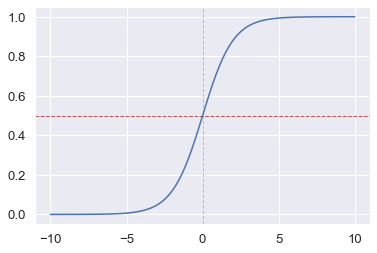

In [142]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100) #-10부터 10사이를 100개로 나눔
y = 1 / ( 1 + np.exp(-x) ) # y 좌표 저장
plt.axhline(y=0.5, color='r', linestyle='--',linewidth=1)
plt.axvline(x=0.0, color='r', linestyle='-.',linewidth=.5)

plt.plot(x, y)
plt.show()

![NEW19.PNG](img/NEW19.PNG)

### 로그 함수와 엔트로피

#### 크로스 엔트로미
#### 실제 데이터의 결과 값인 y

      y = 1일 때
          예측 값이 1에 가까워 질수록 비용 함수의 값은 작어져야 함
          
          반대로 0에 가까워 질수록
              -비용 함수의 값이 무한대로 증가하게 되어 예측이 틀렸다는 것을 보여줘야함
              
      y = 0 일 때
      
         예측이 0으로 맞게 되면 비용 함수는 매우 작은 값을 가짐
         
         반대로 에측이 1로 하게 되어 에측에 실패할 경우 cost 값이 무한대로 증가
         틀렸다는 것을 알 수 있게 해야 함

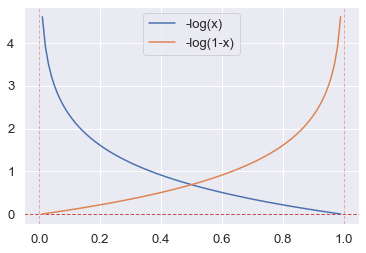

In [143]:

import numpy as np
import matplotlib.pyplot as plt

alpha = 0.1e-1
x = np.linspace(0+alpha, 1-alpha, 100) # 0보다 조금 큰수 / 0보다 조금 작은 수를 100갤 ㅗ나눔
y1 = -np.log(x)
y2 = -np.log(1-x)

plt.axhline(y=0, color='r', linestyle='--',linewidth=1)
plt.axvline(x=1, color='r', linestyle='-.',linewidth=.5)
plt.axvline(x=0, color='r', linestyle='-.',linewidth=.5)
plt.plot(x, y1, label='-log(x)')
plt.plot(x, y2, label='-log(1-x)')
plt.legend(loc='best')
plt.show()

In [144]:
import tensorflow as tf

y_true = [[0, 1, 0], [0, 0, 1]] # 정답 / one hot encoding 방식 / 첫번째는 1을 두번째는 2가 정답
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]] # 예측
loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred) #함수 적용 (
loss.numpy() #결과

array([0.05129331, 2.3025851 ], dtype=float32)


    결과 분석
    
      array([0.05129331, 2.3025851 ], dtype=float32)
      
      0.0129331 <-  비용함수가 낮아지므로 정답에 가깝다.
      2.3025851 <-  비용함수가 높으므로 오답에 가깝다

In [145]:
import tensorflow as tf

# y_true = [[0, 1, 0], [0, 0, 1]] one hot encoding 과 일반 유형은 표현만 다르지 서로 같음
y_true = [[1], [2]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
loss.numpy()

array([0.05129344, 2.3025851 ], dtype=float32)

In [146]:
# 일반 레이러를 one hot encoding으로 변환할 수 있다.
import tensorflow as tf

y_true = [[1], [2]]
y_true = tf.one_hot(y_true, depth=3)
print(y_true)
y_true = tf.reshape(y_true, [-1, 3]) # 3차원으로 변하기 때문에 다시 2차원으로 바꿔주는 과정
print(y_true)
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
loss.numpy()

tf.Tensor(
[[[0. 1. 0.]]

 [[0. 0. 1.]]], shape=(2, 1, 3), dtype=float32)
tf.Tensor(
[[0. 1. 0.]
 [0. 0. 1.]], shape=(2, 3), dtype=float32)


array([0.05129331, 2.3025851 ], dtype=float32)

#### 크로스엔트로피

![NEW20.PNG](img/NEW20.PNG)


    2는 e의0승부터 2승까지 다 더한 값에 e의 2승을 나눈 것
    1은 다더하고 e의 1승을 나눈 것
    0은 다더하고 e의 0승을 나눈 것

    결과가 0.7이라면 1 나머진 0



In [147]:
import tensorflow as tf
import numpy as np

y_true = tf.reshape(tf.one_hot([[1], [2]], depth=3), [-1, 3])
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
print(loss.numpy())

print(-np.log(0.95), -np.log(0.1))

[0.05129331 2.3025851 ]
0.05129329438755058 2.3025850929940455


#### 소프트맥스 함수(Softmax function) 

    - 결과를 모두 더하면 1

In [148]:
import tensorflow as tf
import numpy as np
#a의 값이 클수록 결과 값이 크게 나옴
#큰 값은 강조, 작은 값은 약화시키는 효과
a = np.array([[0.3, 2.9, 4.0]]) 
sm = tf.keras.activations.softmax(tf.convert_to_tensor(a)) # 배열을 tensor로 변환
print(sm.numpy())

[[0.01821127 0.24519181 0.73659691]]


In [149]:
#더하면 모두 1
sm.numpy().sum()

1.0

### 이항 분류 : 레드 와인과 화이트 와인의 구분

#### 와인 데이터 셋

    캘리포니아 어바인 대학 제공 / 특징 12개

In [150]:
# 5.1 와인 데이터셋 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [151]:
print(red.shape)
print(white.shape)

(1599, 12)
(4898, 12)


In [152]:
# 5.2 와인 데이터셋 합치기
red['type'] = 0 
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

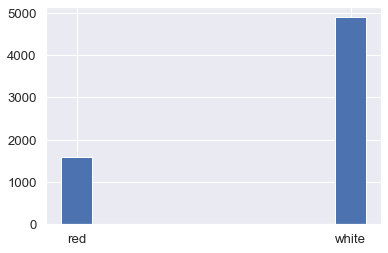

1    4898
0    1599
Name: type, dtype: int64


In [153]:
# 5.3 레드 와인과 화이트 와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
# plt.xticks([0, 1])
plt.xticks([0.05, 0.95], ['red', 'white'])
plt.show()

print(wine['type'].value_counts())

In [154]:
# 5.5 데이터 정규화 , 모든 데이터가 0에서 1사이로 바뀜
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe()) #정규화 시킨 데이터 보여주기

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [155]:
#레드와인과 화이트 와인 행 섞기
# 5.6 데이터 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1) # frac = 1 < 전체 갯수를 보존한 상태서 다 섞어버리기
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy() # 계산 편히 위해 배열로 변환
print(wine_np[:5]) # 5개 데이터만 행으로 보여줌

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
663        0.272727          0.133333     0.156627        0.019939   0.066445   
3349       0.214876          0.060000     0.162651        0.142638   0.063123   
4658       0.272727          0.233333     0.150602        0.033742   0.044850   
2250       0.446281          0.173333     0.325301        0.256135   0.084718   
3271       0.223140          0.160000     0.204819        0.078221   0.058140   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
663              0.038194              0.184332  0.121265  0.333333   
3349             0.086806              0.218894  0.170619  0.480620   
4658             0.145833              0.290323  0.050896  0.379845   
2250             0.156250              0.527650  0.283594  0.279070   
3271             0.090278              0.195853  0.091190  0.434109   

      sulphates   alcohol   quality  type  
663    0.089888  0.202899  0.333333   1.0 

아까 위에서 설명 했듯이

학습 데이터와 테스트 데이터를 분리 해보자

In [156]:

# 5.7 train 데이터와 test 데이터로 분리
import tensorflow as tf
train_idx = int(len(wine_np) * 0.8)  # 트레인과 테스트의 비율은 8:2

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1] # X는 정답제외하고 Y는 정답만
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2) #one hot encoding으로 변환
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2) # 위와 동일
print(train_Y[0]) # 0은 [1,0]
print(test_Y[0]) # 1은 [ 0,1]

[0.27272727 0.13333333 0.15662651 0.01993865 0.06644518 0.03819444
 0.1843318  0.1212647  0.33333333 0.08988764 0.20289855 0.33333333]
1.0
[0.26446281 0.18       0.18072289 0.0904908  0.03156146 0.09027778
 0.18663594 0.12512049 0.52713178 0.11235955 0.49275362 0.66666667]
1.0
[0. 1.]
[0. 1.]


In [157]:
# 5.8 와인 데이터셋 분류 모델 생성
import tensorflow as tf
#뉴런 개수 12개(input_shape) -> 48개 -> 24개 -> 12개 -> 2개
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])
#옵티마이저(정규화)는 아담
#로스율은 크로스 엔트로피
#모니터링 좌표값은 accuracy
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_17 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_18 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


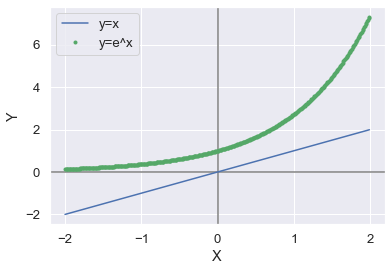

In [158]:
# 소프트 맥스를 설명하는 그래프
# 작은 것은 약화 큰 것은 증폭!
# 음수는 양수로
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2, 2, 0.01)
e_x = math.e ** x

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, x, 'b-', label='y=x')
plt.plot(x, e_x, 'g.', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [159]:

# 5.9 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
#훈련은 25번, 편향을 업데이트하는 샘플  수, 검증용 데이터의 비중은 25%로

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.1252 - accuracy: 0.9559 - val_loss: 0.0749 - val_accuracy: 0.9731
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0609 - accuracy: 0.9831 - val_loss: 0.0366 - val_accuracy: 0.9938
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9885
Epoch 4/25
122/122 [==============================] - 0s 4ms/step - loss: 0.0551 - accuracy: 0.9843 - val_loss: 0.1624 - val_accuracy: 0.9315
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 0.0582 - accuracy: 0.9831 - val_loss: 0.0314 - val_accuracy: 0.9923
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9872 - val_loss: 0.0706 - val_accuracy: 0.9754
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9872 - val_loss: 0.0296 - val_accuracy: 0.9923
Epoch 

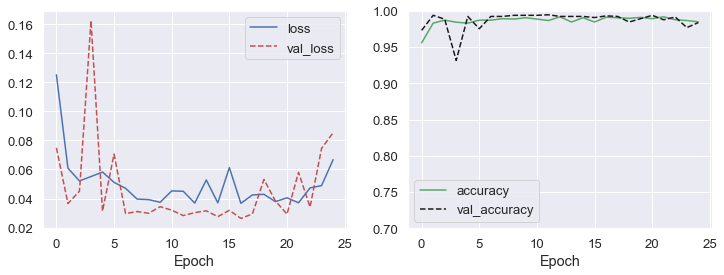

In [160]:
# 5.10 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [161]:
# 5.11 분류 모델 평가
model.evaluate(test_X, test_Y) # 0과 가까울수록 / 1과 가까울수록

41/41 [==============================] - 0s 1ms/step - loss: 0.0875 - accuracy: 0.9869


[0.08748523890972137, 0.986923098564148]

#### 다항 분류 : 와인 품질 분류

    -등급 3~9
        이 모든 등급을 에측하기에는 등급에 따른 데이터 수 차이가 큼
            다시 등급을 3개 정도로 나누어 예측

In [162]:
# 5.12 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


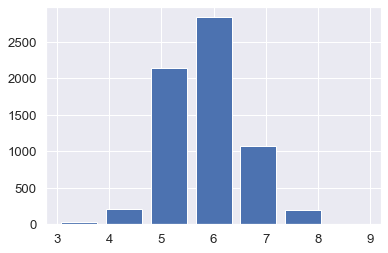

In [163]:
# 5.13 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [164]:
# 5.14 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
#df.loc[data['컬럼'] 조건, '새로운 컬럼명'] = 값
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0 # 3~5
wine.loc[wine['quality'] == 6, 'new_quality'] = 1 # 6
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2 # 7~9

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())
wine.shape

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


(6497, 14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


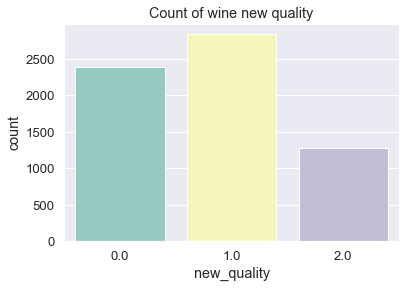

In [165]:

import matplotlib.pyplot as plt;
import seaborn as sns;

sns.countplot('new_quality', data=wine, palette="Set3");
plt.title('Count of wine new quality') ;

In [166]:

# 5.15 데이터 정규화 및 train, test 데이터 분리
del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min()) #정규화 과정
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8) # 훈련은 80% 검증은 20%
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [167]:
# 5.16 와인 데이터셋 다항 분류 모델 생성 및 학습
# 12->48->24->12->3(3인 이유는 3가지로 나눠서)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
122/122 [==============================] - 1s 4ms/step - loss: 0.4593 - accuracy: 0.7965 - val_loss: 0.3995 - val_accuracy: 0.7954
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8176 - val_loss: 0.4069 - val_accuracy: 0.8146
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8093 - val_loss: 0.4383 - val_accuracy: 0.7954
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8155 - val_loss: 0.4069 - val_accuracy: 0.8054
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8124 - val_loss: 0.4086 - val_accuracy: 0.8031
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8111 - val_loss: 0.4093 - val_accuracy: 0.8138
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8165 - val_loss: 0.4125 - val_accuracy: 0.7846
Epoch 

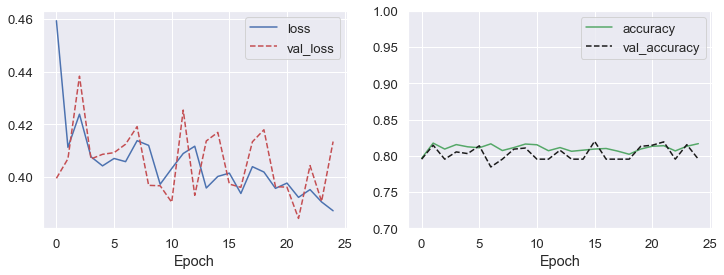

In [168]:
# 5.17 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [169]:
# 5.18 다항 분류 모델 평가
#80%의 정확도 
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 997us/step - loss: 0.4198 - accuracy: 0.7992


[0.41976234316825867, 0.7992307543754578]

### 다항 분류 : 패션 MNIST

In [170]:
# 5.19 Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

60000 10000


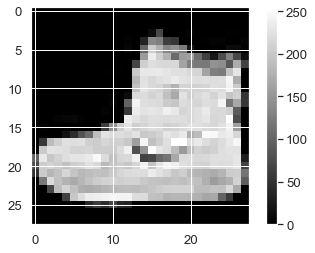

9


In [171]:
# 5.20 데이터 확인
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [172]:
len(train_Y)

60000

In [173]:
# 5.21 데이터 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [174]:
# 5.22 Fashion MNIST 분류 모델
#2개 층만 만듬
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #28x28로 평탄화
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [175]:
# 5.23 Fashion MNIST 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 4s 2ms/step - loss: 0.5241 - accuracy: 0.8188 - val_loss: 0.4349 - val_accuracy: 0.84693 -  - ETA
Epoch 2/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8612 - val_loss: 0.3710 - val_accuracy: 0.8648
Epoch 3/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3489 - accuracy: 0.8720 - val_loss: 0.3462 - val_accuracy: 0.8754
Epoch 4/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3219 - accuracy: 0.8826 - val_loss: 0.3672 - val_accuracy: 0.8669
Epoch 5/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3029 - accuracy: 0.8877 - val_loss: 0.3365 - val_accuracy: 0.8779
Epoch 6/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2852 - accuracy: 0.8947 - val_loss: 0.3214 - val_accuracy: 0.8825
Epoch 7/25
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.8984 - val_loss: 0.3262 - val

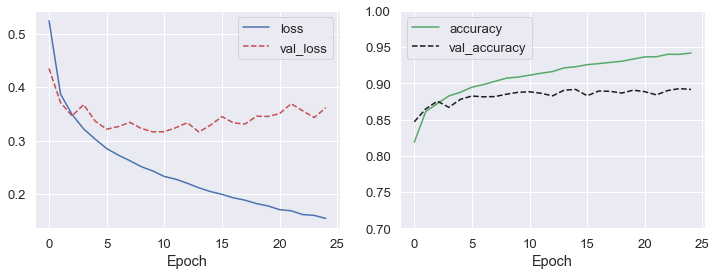

In [176]:
# 5.24 Fashion MNIST 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [177]:
# 5.25 Fashion MNIST 분류 모델 평가
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.4110 - accuracy: 0.8842


[0.41098731756210327, 0.8841999769210815]

#### CNN(합성곱) 개요

    이미지 분류 경진대회ILSVRC(Image Large Scale Visual Recognition Challenge)
        -이미지넷 데이터베이스 중 일부를 사용해 이미지 범주를 분류
        
        -대용량의 이미지셋을 주고 이미지 분류 알고리즘의 성능을 평가하는 대회
            143만개의 이미지로, 1000개의 클래스 분류
            
    2010,2011년에 우승을 차지한 알고리즘
        -얕은 구조(shallow architecture)
    
    
    2012년 CNN 기반 딥러닝 알고리즘 AlexNet이 우승
        -깊은 구조(deep architecture), 약 26%였던 인식 오류율을 16%까지 개선
        
    
    2017년 종료
        - 2015년
            사람의 정확도라고 알려진 5%를 추월
            
        - 2017년
            SENet의 경우 2.3%로 사람의 인식 에러율의 절반도 안됨
            
 
 
#### AlexNet(2012)의 기본 구조

    -LeNet-5와 크게 다르지 않음
    -2개의 GPU로 병렬연산을 수행하기 위해서 벙력적인 구조로 설계
        
  ![NEW21.PNG](img/NEW21.PNG)

### CNN(Convolutional Neural Network) 개요

    CNN은 위 알고리즘 연구들을 바탕으로 개발됨
    
#### CNN
    
    이미지 공간 정보를 유지한 상태로 학습이 가능한 모델
    
        특징 추출기 + 분류기 구성
        
    일반 Dense() 층과 비교
    
        Fully Connected Neural Network와 비교하여 다음과 같은 차별성
            각 레이어의 입출력 데이터의 형상 유지(2d를 계속 2d로 유지한다, 이미지의 그림을 유지)
                - 이미지의 공간 정보를 유지하면서 인접 이미지와의 특징을 효과적으로 인식
                
            복수의 필터로 이미지의 특징 추출 및 학습
                - 추출한 이미지의 특징을 모으고 강화하는 Pooling 레이어
            
            일반 신경망과 비교하여 학습 패러미터가 매우 적음
                - 필터를 공유 패러미터로 사용하기 때문
                
    
    Lecun 1998년
    
        - LeNet이라는 Network를 1998년에 제안
            얀 르쿤 연구팀
            
        - 이것이 최초의 CNN
        
        
    특징 추출기(Feature Extractor) + 분류기(classifier)
        - 이미지의 특징을 추출하는 부분과 클래스를 분류하는 부분으로 나눔
        
    특징 추출기 :
        - 자동으로 특징을 추출하는 필터를 생성하는 것이 목적
            Convolution Layer(컨보루션 레이어)와 pooling Layer를 여러 겹 쌓는 형태로 구성
            
            Convolution Layer: 입력 데이터에 필터를 적용 후 활성화 함수를 반영하는 필수 요소
            
            Poling Layer : 선택적인 레이어
                Subsampling, downsampling 이라고도 부름
                
 ![NEW22.png](img/NEW22.png)
 <center>특징 추출 알고리즘</center>        
                
    분류기
        - CNN 마지막 부분에는 이미지 분류를 위한 Fully Connected 레이어가 추가
            처음은 Flatten 레이어
                이미지의 특징을 추출하는 부분과 이미지를 분류하는 부분 사이에 이미지 형태의 데이터를 배열 형태로 변환
                
                
#### CNN의 컨볼루션
    컨볼루션 층
        - 각 이미지에서 특정 특징을 활성화하는 컨볼루션 필터 집합에 입력 이미지를 통과
        - ReLu 사용
            음수 값을 0에 매핑하고 양수 값을 유지하고 더 빠르고 효과적인 학습을 가능
            
            
    폴링(서브샘플링) 층
        -비선형 다운 샘플링을 수행
            네트워크에서 학습해야 하는 매개 변수 수를 줄여서 출력을 간소화
                차원을 축소해 연산량을 감소
                이미지의 강한 특징만을 추출하는 특징 선별 효과가 있음
                
                
    여러 계층에서 특징을 학습한 다음 분류 단계로 이동
    K 차원의 벡터를 출력하는 완전 연결 계층
        
        - K는 네트워크가 예측할 수 있는 클래스의 수
            벡터에는 분류되는 이미지의 각 클래스에 대한 확률
        
        - 마지막 계층에서는 소프트맥스와 같은 분류 계층을 사용하여 분류 출력을 제공
        
        
        
★간단하게 요약하면 강렬한 특징들만을 추출한 뒤 학습하는 것★
    
    1단계 : 컨볼루션 층에서 이미지 추출
    
    2단계 :  예를 들어 8x8의 1차원의 배열이 있다면 4x4씩 묶어서 하나의 대표값으로 블록을 압축해 매개 변수 수를 줄임
             이 폴링 방식에는 
                블록 내의 원소들 중 최대값을 대표값으로 선택하는 Max Pooling
                블록 내의 원소들의 평균값을 대표값으로 선택하는 Average Pooling
                블록 내 원소의 크기를 선택 확률로 변환 후 확률에 따라 선택하는 Stochastic Pooling
                이 있다.
                
                
  

#### 컨볼루션의 동기
        
        이미지 위치에 따른 밀접한 상관관계
            평탄화(Flatten) 작업을 수행하는 일반 딥러닝 구조
                이러한 공간적인 특성이 소멸 그렇기 때문에 아래 컨볼루션을 사용
                
        컨볼루션
            데이터의 공간적인 특성이 유지!
            
#### 컨볼루션 계산 방법
    
        필터(가중치)와 편향이 필요
        - 4x4 흑백 이미지, 2x2 필터
            필터(filter), 커널(kernel), 윈도(window)라고도 부름
            
            
![NEW23.png](img/NEW23.png)

        저 형형색색의 원들은 가만히 있고 필터만 음직인다.
        필터는 보폭(stride)에 맞춰 음직이고 위 사진과 같은 상황은 1로 필터가 되어있으며
        왼쪽위부터 오른쪽끝까지가면 1칸내려오고 다시 왼쪽부터 오른쪽으로 이동


4x4에서 각 구역(4블록씩 묶어서)을 필터에 곱한 후 3x3으로 줄일 수 있다.
    
    필터가 2 1 -1 2, 구역이 1 2 3 5면 위치에 맞게 곱해서 더함
    
![NEW24.png](img/NEW24.png)

(1*2) + (2 * 1 ) + ((-1) * 3) + (5 * 1) = 6

이제 만들어진 3x3 블록을 특성 맵(feature map)이라고 한다.

★편향을 더할땐 특성 맵 블록마다 더해주면됨


#### 컬러인 경우
    
    컬러인 경우엔 RGB(레드,그린,블루) 값으로 구성되어 있기 때문에 이미지가 겹쳐지는 부분이 3개다 흑백은 1개
    
    필터는 채널 수 만큼 필요(각기 다른 필터)
    
    

필터는 여러 개를 쓸 수 있다.

Image: 이미지 수,가로,세로,채널 image, Filter: 가로,세로,채널,필터수, Stride: 1x1




### 패딩(Padding)

    합성곱의 결과인 특징 맵
    
        - Filter와 Stride에 작용으로 Feature Map 크기는 입력 데이터보다 작음
        
    패딩
    
        - 입력 데이터 외각에 지정된 픽셀 만큼 특정 값으로 채워넣는 것 의미
            결과인 특징 맵 크기가 줄어드는 것을 방지하는 방법
            
        - 보통 패딩 값으로 0으로 채워 넣음
        
    필터 사이즈가 k라면?
        - 사방으로 k/2 만큼의 패딩
        
        - k=3
            
           3 / 2 = 1 만큼을 집어 넣음
           
![NEW25.png](img/NEW25.png)





### Pooling 레이어

#### 데이터의 공간적인 특성을 유지하면서 크기를 줄여주는 층
    - 컨볼루션의 결과인 특성 맵을 줄이거나 특정 데이터를 강조
    
    
        연속적인 합성곱 층 사이에 삽입
        학습할 가중치를 줄이고 과적합(오버피팅)문제도 해결 정규화와 비슷
    - 일반적으로 폴링크기와 스트라이드를 같은 크기로 설정
        (모든 원소가 한번씩 처리 되도록)
        
#### 폴링의 종류
                블록 내의 원소들 중 최대값을 대표값으로 선택하는 Max Pooling
                블록 내의 원소들의 평균값을 대표값으로 선택하는 Average Pooling
                블록 내 원소의 크기를 선택 확률로 변환 후 확률에 따라 선택하는 Stochastic Pooling
                
                
#### 하나의 이미지에 커널은 여러개 구성 가능
    32개의 필터 사용
        32개의 특징 맵이 생성
        
    32개의 특징 맵이 다음 층에서 사용
        32개의 채널로 사용
        만일 3*3 커널이라면 3*3*32의 구조가 됨
        
        
![NEW26.png](img/NEW26.png)